In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager as fm
from  matplotlib import cm
from mpl_toolkits.basemap import Basemap
%matplotlib inline
plt.style.use('ggplot')

In [211]:
import os

In [2]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [13]:
df = pd.read_csv('crime_data.csv', parse_dates = ['Time Occurred'])

In [14]:
df.columns = [col.strip() for col in df.columns]
#always check to see if there are problems with the data column name

In [707]:
df.isna().sum()

DR Number                       0
Date Reported                   0
Date Occurred                   0
Time Occurred                   0
Area ID                         0
Area Name                       0
Reporting District              0
Crime Code                      0
Crime Code Description        386
MO Codes                   190179
Victim Age                 140487
Victim Sex                 161916
Victim Descent             161956
Premise Code                   86
Premise Description          3257
Weapon Used Code          1172473
Weapon Description        1172474
Status Code                     2
Status Description              0
Crime Code 1                    6
Crime Code 2              1643352
Crime Code 3              1752737
Crime Code 4              1755232
Address                         0
Cross Street              1463556
Location                        9
dtype: int64

In [708]:
df.info()
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1755318 entries, 0 to 1755317
Data columns (total 26 columns):
DR Number                 int64
Date Reported             object
Date Occurred             object
Time Occurred             object
Area ID                   int64
Area Name                 object
Reporting District        int64
Crime Code                int64
Crime Code Description    object
MO Codes                  object
Victim Age                float64
Victim Sex                object
Victim Descent            object
Premise Code              float64
Premise Description       object
Weapon Used Code          float64
Weapon Description        object
Status Code               object
Status Description        object
Crime Code 1              float64
Crime Code 2              float64
Crime Code 3              float64
Crime Code 4              float64
Address                   object
Cross Street              object
Location                  object
dtypes: float64(7), int64(

In [15]:
df["Exact Time Occurred"] = df["Time Occurred"].astype(str)
df["Datetime"] = pd.to_datetime(df["Date Occurred"] + " " +  df[
    "Exact Time Occurred"], format = "%m/%d/%Y %H%M")

In [16]:
df['hour occurred'] = df["Datetime"].apply(lambda x: x.hour)
df['month occurred'] = df["Datetime"].apply(lambda x: x.month)
df['weekday occurred'] = df["Datetime"].apply(lambda x: x.weekday())
df['dom occurred'] = df["Datetime"].apply(lambda x: x.day)
df['day occurred'] = df["Datetime"].apply(lambda x: x.weekday_name)
df['year occurred'] = df["Datetime"].apply(lambda x: x.year)
df['month'] = df["Datetime"].apply(lambda x: x.strftime("%B"))
df['month occurred'] = df["Datetime"].apply(lambda x: x.month)

In [17]:
coordinates = df['Location'].str.strip('()').str.split(', ', expand = True).rename(columns = {0: 'Latitude', 1: 'Longitude'})

df = df.join(coordinates)

df['Latitude'] = df['Latitude'].astype(float) 
df['Longitude'] = df['Longitude'].astype(float) 
df['Longitude'].describe()
df['Latitude'].describe()

count    1.755309e+06
mean     3.393657e+01
std      2.198905e+00
min      0.000000e+00
25%      3.400910e+01
50%      3.406250e+01
75%      3.417740e+01
max      3.479070e+01
Name: Latitude, dtype: float64

In [18]:
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
df.head()

DR Number Date Reported Date Occurred Time Occurred  Area ID    Area Name  \
0    1208575    03/14/2013    03/11/2013          1800       12  77th Street   
1  102005556    01/25/2010    01/22/2010          2300       20      Olympic   
2        418    03/19/2013    03/18/2013          2030       18    Southeast   
3  101822289    11/11/2010    11/10/2010          1800       18    Southeast   
4   42104479    01/11/2014    01/04/2014          2300       21      Topanga   

   Reporting District  Crime Code                    Crime Code Description  \
0                1241         626         INTIMATE PARTNER - SIMPLE ASSAULT   
1                2071         510                          VEHICLE - STOLEN   
2                1823         510                          VEHICLE - STOLEN   
3                1803         510                          VEHICLE - STOLEN   
4                2133         745  VANDALISM - MISDEAMEANOR ($399 OR UNDER)   

              MO Codes  Victim Age Victim Sex Victim Descent  Premise Code  \
0  0416 0446 1243 2000        30.0          F              W         502.0   
1                  NaN         NaN        NaN            NaN         101.0   
2                  NaN        12.0        NaN            NaN         101.0   
3                  NaN         NaN        NaN            NaN         101.0   
4                 0329        84.0          M              W         501.0   

                            Premise Description  Weapon Used Code  \
0  MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)             400.0   
1                                        STREET               NaN   
2                                        STREET               NaN   
3                                        STREET               NaN   
4                        SINGLE FAMILY DWELLING               NaN   

                               Weapon Description Status Code  \
0  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)          AO   
1                                             NaN          IC   
2                                             NaN          IC   
3                                             NaN          IC   
4                                             NaN          IC   

  Status Description  Crime Code 1  Crime Code 2  Crime Code 3  Crime Code 4  \
0        Adult Other         626.0           NaN           NaN           NaN   
1        Invest Cont         510.0           NaN           NaN           NaN   
2        Invest Cont         510.0           NaN           NaN           NaN   
3        Invest Cont         510.0           NaN           NaN           NaN   
4        Invest Cont         745.0           NaN           NaN           NaN   

                                   Address Cross Street              Location  \
0  6300    BRYNHURST                    AV          NaN  (33.9829, -118.3338)   
1                                 VAN NESS         15TH  (34.0454, -118.3157)   
2   200 E  104TH                        ST          NaN   (33.942, -118.2717)   
3                                     88TH         WALL  (33.9572, -118.2717)   
4  7200    CIRRUS                       WY          NaN  (34.2009, -118.6369)   

  Exact Time Occurred            Datetime  hour occurred  month occurred  \
0                1800 2013-03-11 18:00:00             18               3   
1                2300 2010-01-22 23:00:00             23               1   
2                2030 2013-03-18 20:30:00             20               3   
3                1800 2010-11-10 18:00:00             18              11   
4                2300 2014-01-04 23:00:00             23               1   

   weekday occurred  dom occurred day occurred  year occurred  Latitude  \
0                 0            11       Monday           2013   33.9829   
1                 4            22       Friday           2010   34.0454   
2                 0            18       Monday           2013   33.9420   
3                 2            10    Wednesday 

## General Trends
### How crime number varied in LA since 2010?

- Crime number achieved its lowest level at 2013 in LA.
- Crime number has been increasing since 2013 and arrived its hightest level in 2017.
- Crime increasing rate has dropped though in last 2 years.

In [111]:
df_nb_year = pd.DataFrame(df.groupby('year occurred')['DR Number'].count())
df_nb_year.rename(columns={"DR Number":'Number'}, inplace=True)
df_nb_year["Increase"] = (df_nb_year.Number/df_nb_year.Number.shift(1) - 1) * 100
df_nb_year["Increase"].fillna(0, inplace=True)

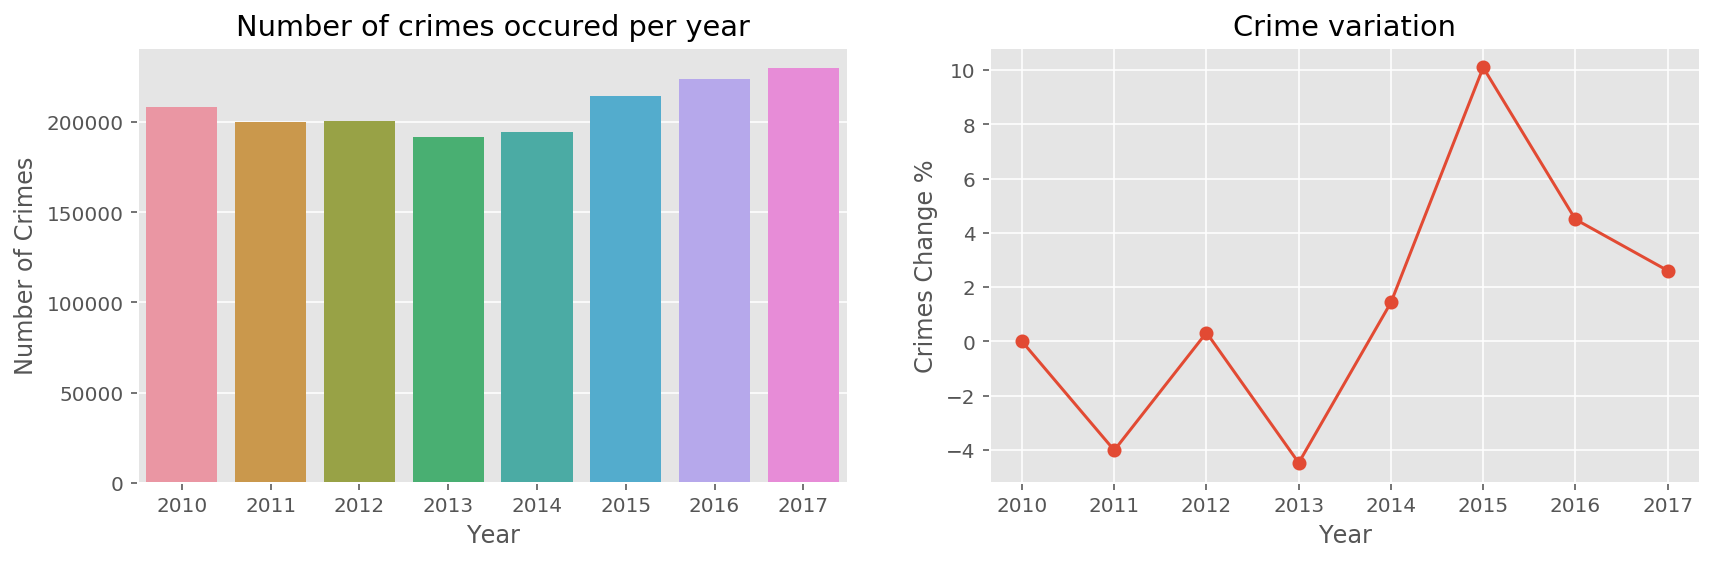

In [112]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
sns.barplot(df_nb_year[:-1].index, df_nb_year["Number"][:-1], ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Crimes');
ax1.set_title('Number of crimes occured per year')

plt.plot(df_nb_year[:-1].index, df_nb_year["Increase"][:-1], axes=ax2, marker='o')
ax2.set_xlabel('Year')
ax2.set_ylabel('Crimes Change %')
ax2.set_title('Crime variation');

In [113]:
percent = 0.6
df_percent = df['Crime Code Description'].value_counts(1).cumsum()<=percent
Crime_Code_Description_most = df_percent[df_percent].index.values
print(Crime_Code_Description_most)
print(len(Crime_Code_Description_most))

['BATTERY - SIMPLE ASSAULT' 'BURGLARY FROM VEHICLE' 'VEHICLE - STOLEN'
 'BURGLARY' 'THEFT PLAIN - PETTY ($950 & UNDER)' 'THEFT OF IDENTITY'
 'INTIMATE PARTNER - SIMPLE ASSAULT'
 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS) 0114'
 'VANDALISM - MISDEAMEANOR ($399 OR UNDER)']
9


In [114]:
df_index_crime = df.set_index('Crime Code Description')
df_most = df_index_crime.loc[Crime_Code_Description_most, :]
df_most.reset_index(inplace=True)

In [115]:
labels = list(df['Crime Code Description'].value_counts(1)
              [Crime_Code_Description_most].index) + ['OTHERS']
values = list(df['Crime Code Description'].value_counts(1)
              [Crime_Code_Description_most].values*100) + [100 - percent * 100]

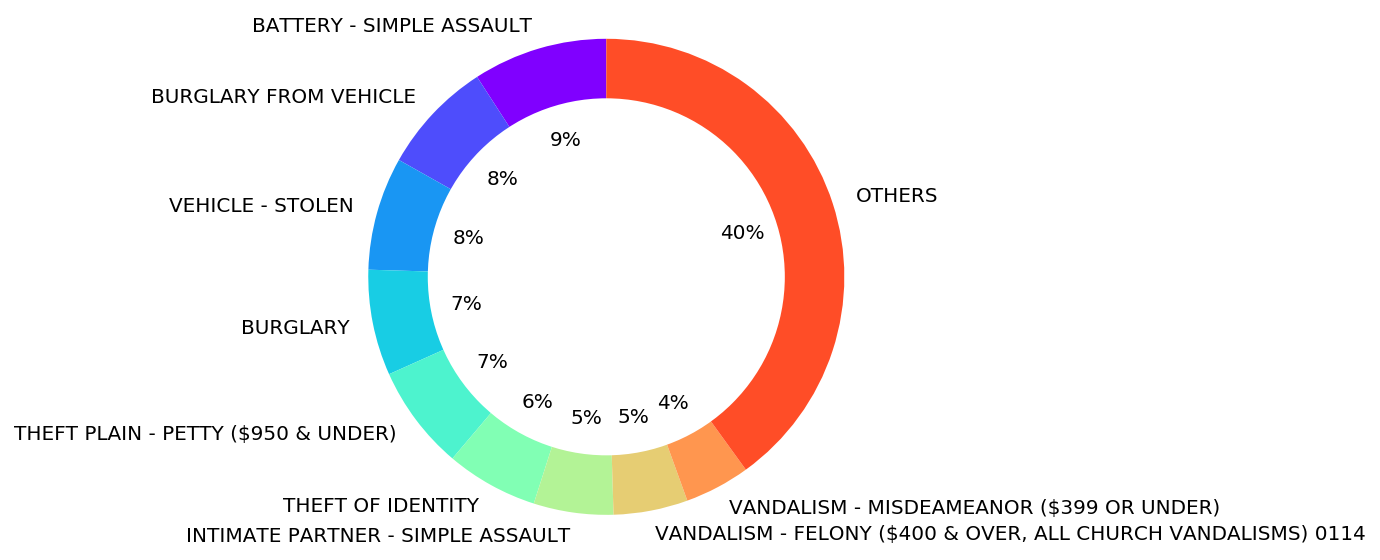

In [116]:
# Pie chart
labels = labels
sizes = values

colors = cm.rainbow(np.arange(len(sizes))/len(sizes))

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.f%%', startangle=90, colors=colors)
#draw circle
centre_circle = plt.Circle((0,0),0.75,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()

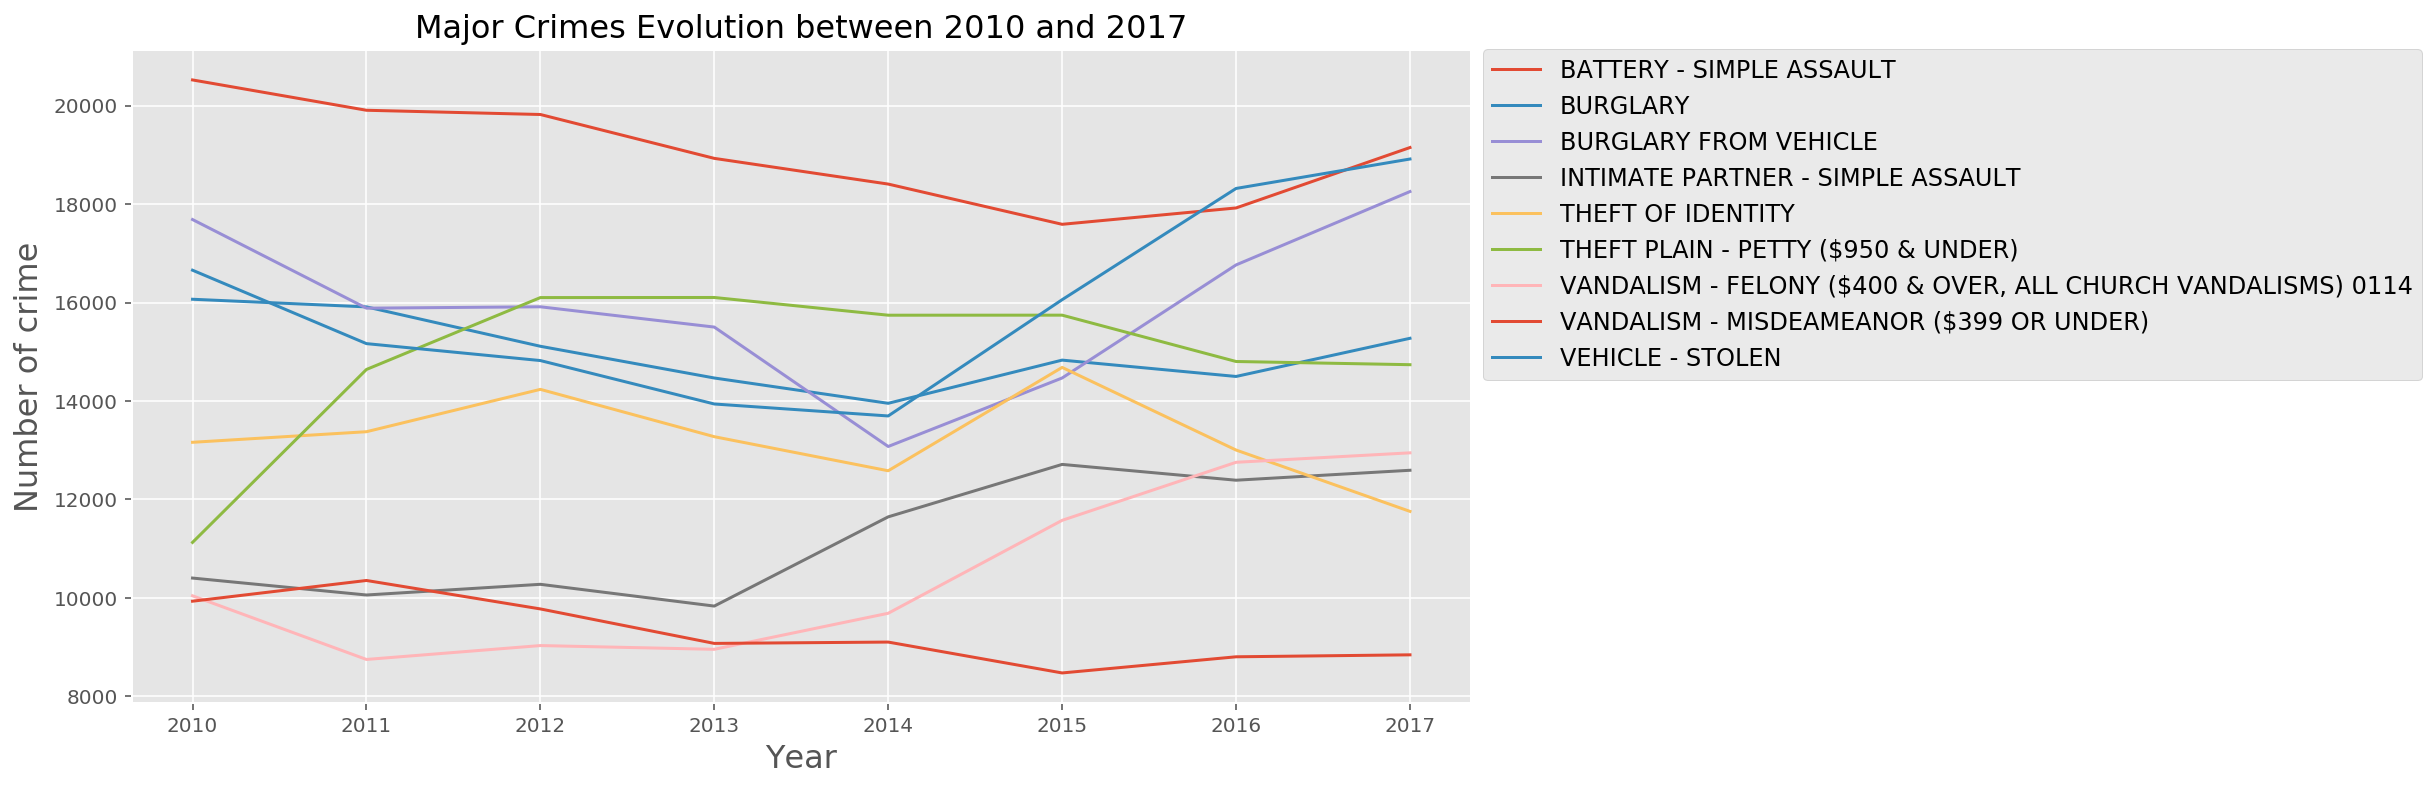

In [117]:
ax = df_most.groupby([ 'year occurred','Crime Code Description'])[
    'DR Number'].count().unstack().loc[2010:2017,:].plot(figsize=(12,6))
ax.legend(bbox_to_anchor=(1.0, 1.02), fontsize=12)
plt.title('Major Crimes Evolution between 2010 and 2017', fontsize=16)
plt.ylabel('Number of crime', fontsize=16)
plt.xlabel('Year', fontsize=16);

### Where crimes happened?

81.2641356153


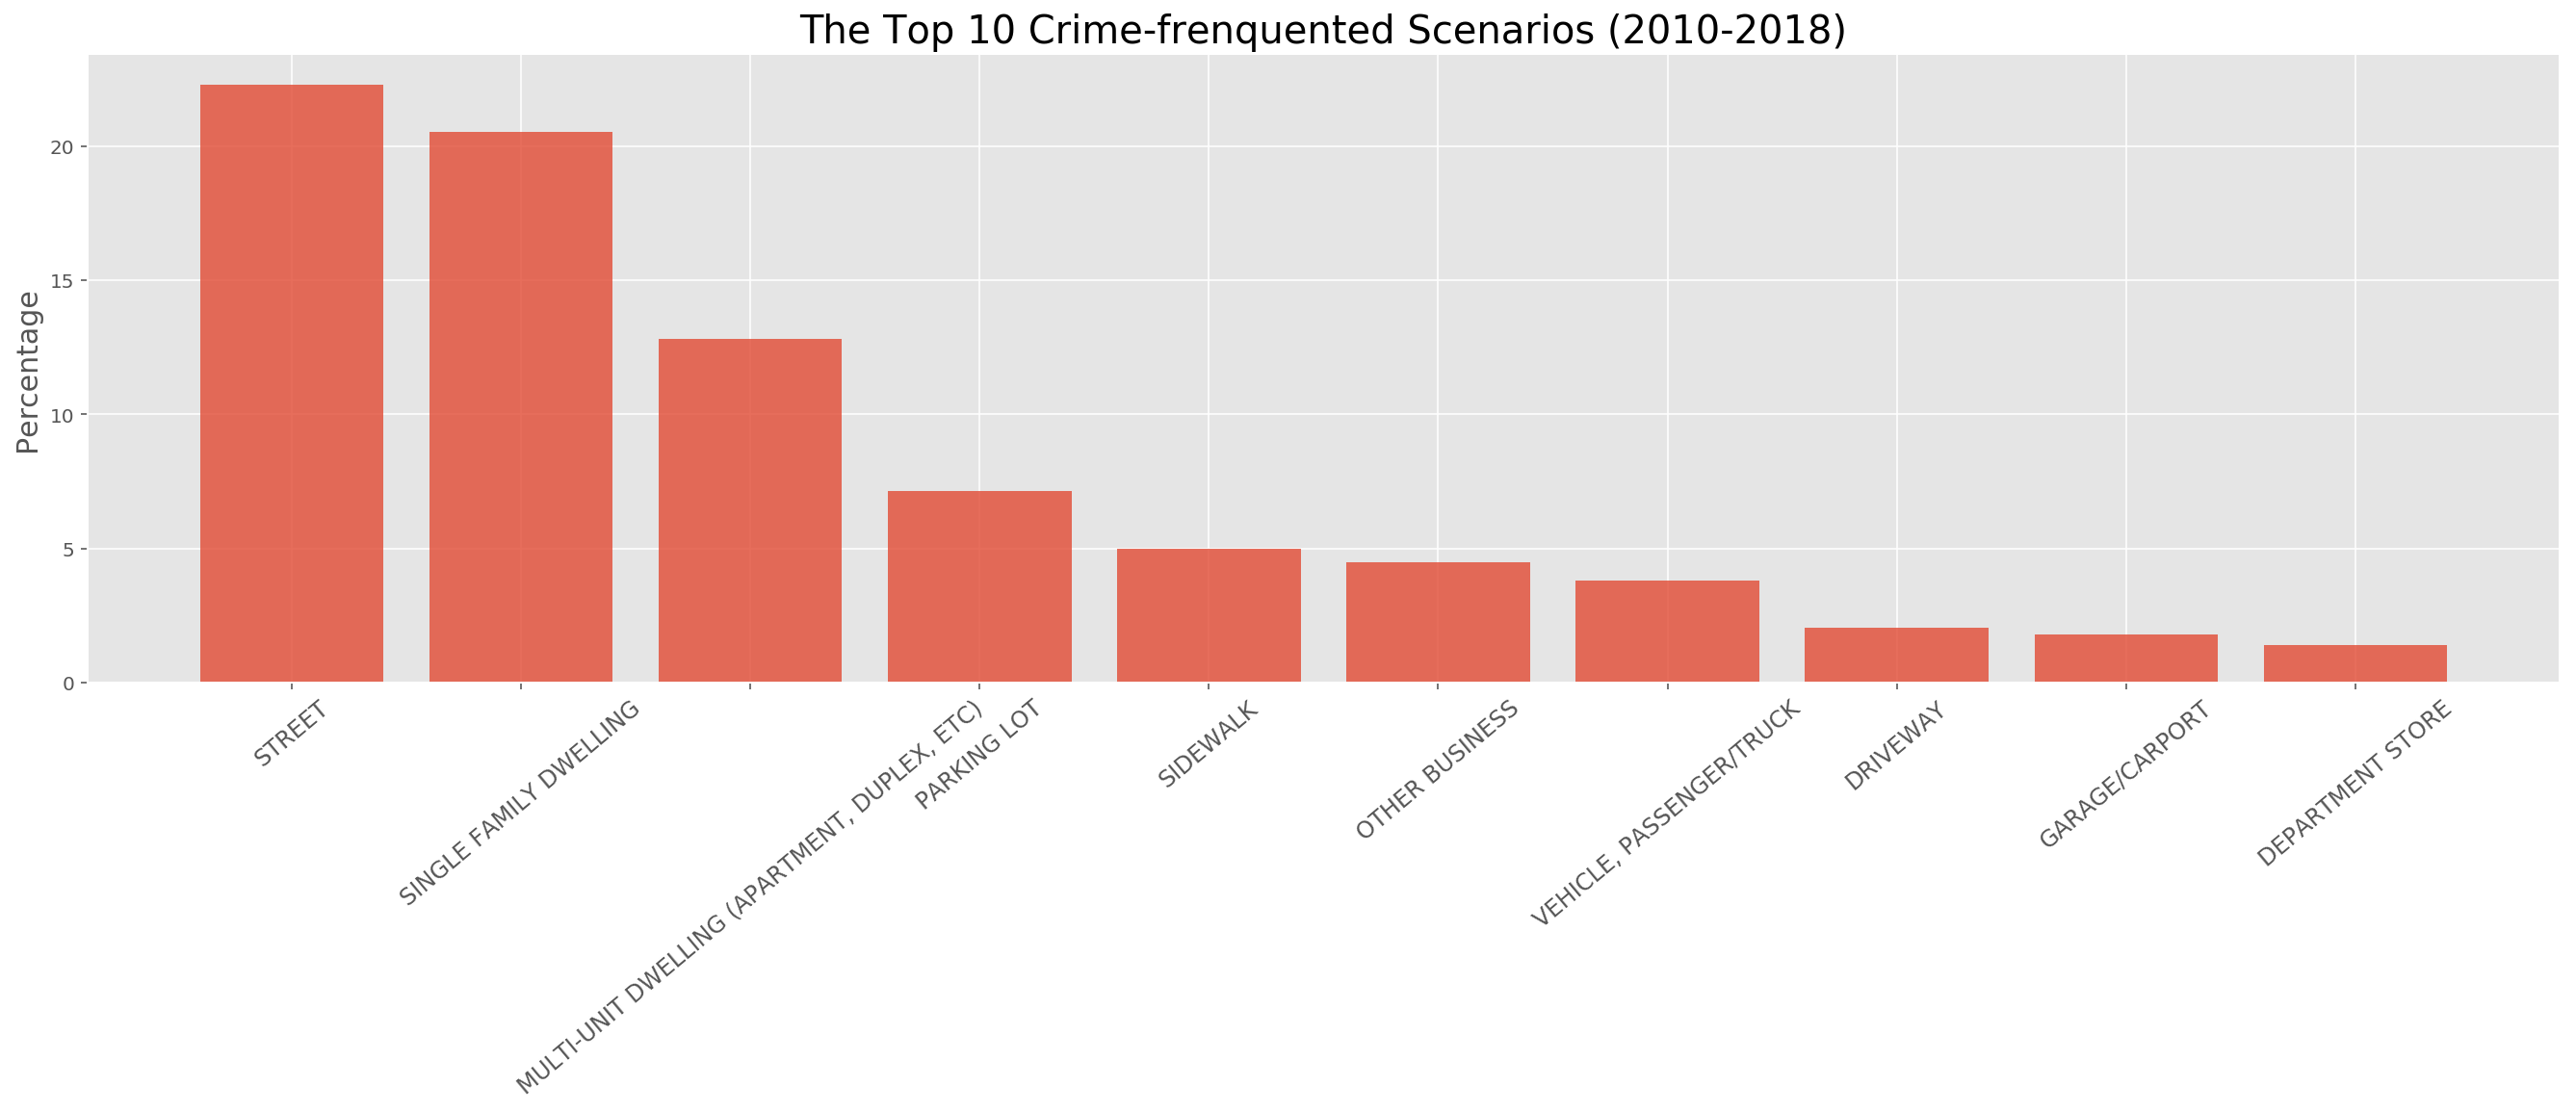

In [118]:
first_n = 10
senario_counts_pec = (df.groupby(
    'Premise Description')['DR Number'].count()/df.shape[0]*100).sort_values(
    ascending=False)[:first_n]
print(senario_counts_pec.sum())

plt.figure(figsize=(23,6))
plt.bar(range(first_n), senario_counts_pec, alpha=.8)
plt.xticks(range(first_n), senario_counts_pec.index, rotation='40', fontsize=12)
plt.ylabel('Percentage', fontsize=15)
plt.title('The Top {} Crime-frenquented Scenarios (2010-2018)'.format(first_n), fontsize=20);

Among 81% of total crime happened under 10 scenarios, 

- the most common scenarios is Street about 28%

- about 1/3 of the crimes happened inside house (single familey dwelling + multi-unit dwelling).

In [121]:
area_counts

Area Name
77th Street    122072
Southwest      113019
N Hollywood     95359
Pacific         92768
Southeast       92212
Mission         88071
Northeast       84343
Van Nuys        83583
Newton          82445
Devonshire      81570
Topanga         81377
Hollywood       80740
Olympic         78485
Harbor          77811
Central         76259
West Valley     74932
Rampart         74123
West LA         73467
Wilshire        71334
Foothill        67159
Hollenbeck      64189
Name: DR Number, dtype: int64

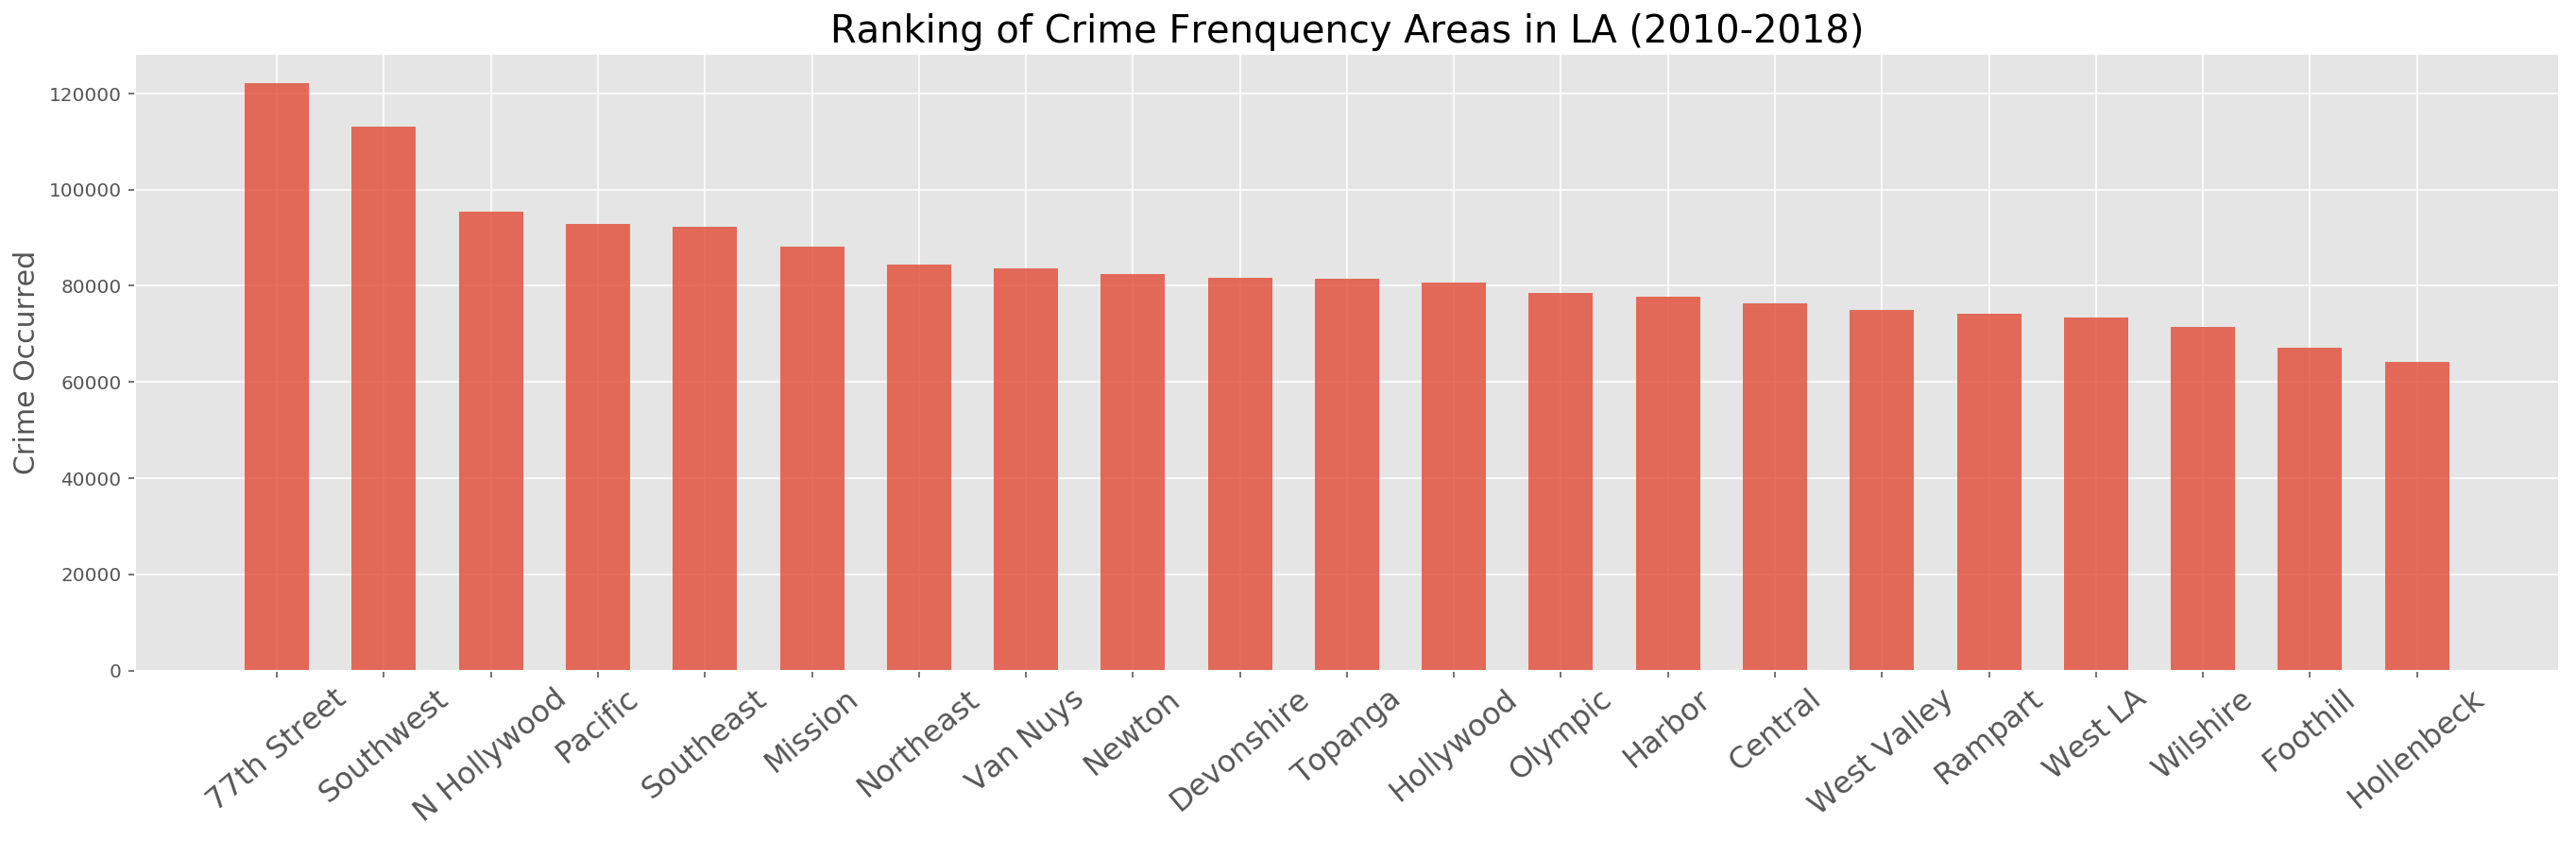

In [122]:
area_counts = df.groupby(
    'Area Name')['DR Number'].count().sort_values(ascending=False)
plt.figure(figsize=(23,6))
plt.bar(range(area_counts.size), area_counts, alpha=.8, width=0.6)
plt.xticks(range(area_counts.size), area_counts.index, rotation='40', fontsize=16)
plt.ylabel('Crime Occurred', fontsize=15)
plt.title('Ranking of Crime Frenquency Areas in LA (2010-2018)', fontsize=20);

### When Crimes Happened?

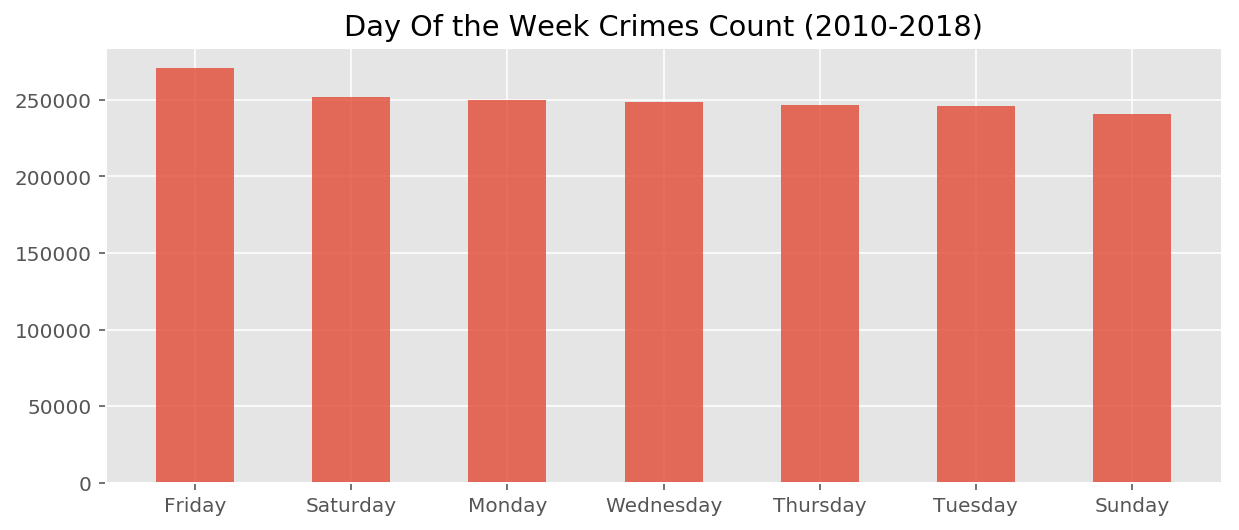

In [123]:
dow_count = df.groupby('day occurred')['DR Number'].count().sort_values(ascending=False)

plt.figure(figsize=(10,4))
plt.bar(range(dow_count.size), dow_count, width=0.5, alpha=.8)
plt.xticks(range(dow_count.size), dow_count.index);
plt.title('Day Of the Week Crimes Count (2010-2018)');

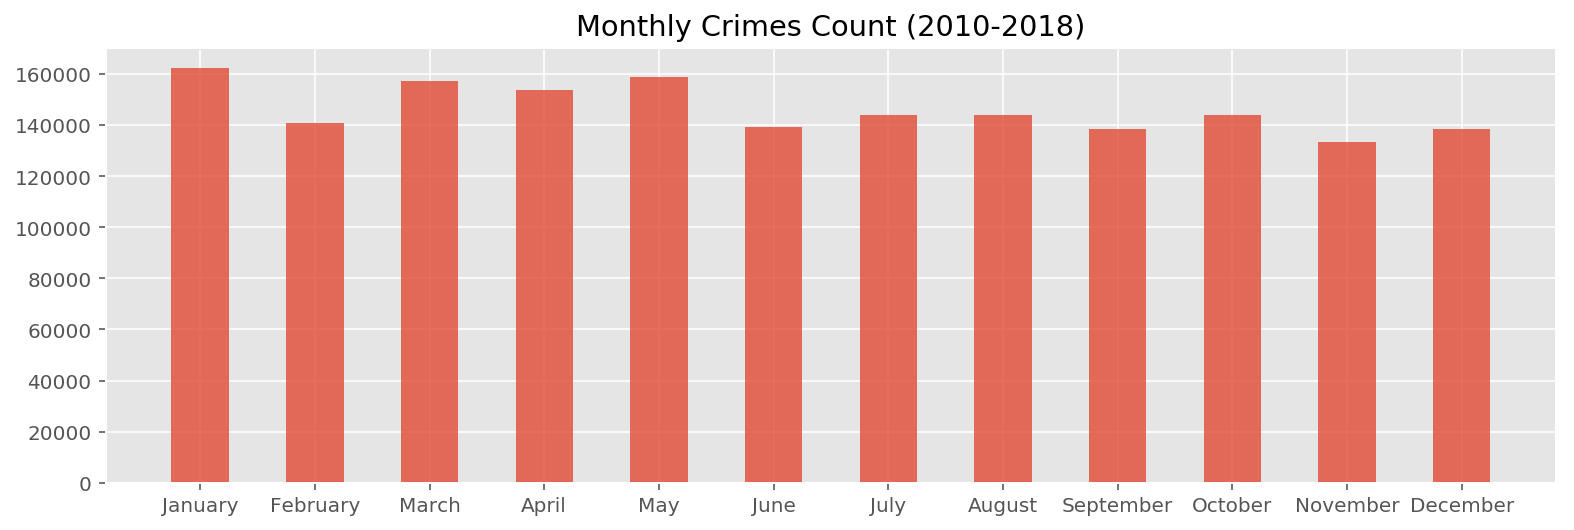

In [124]:
monthly_count = df.groupby(['month occurred','month'])[
    'DR Number'].count().sort_index().reset_index()

plt.figure(figsize=(13,4))
plt.bar(range(monthly_count.shape[0]), monthly_count['DR Number'], width=0.5, alpha=.8)
plt.xticks(range(monthly_count.shape[0]), monthly_count.month);
plt.title('Monthly Crimes Count (2010-2018)');

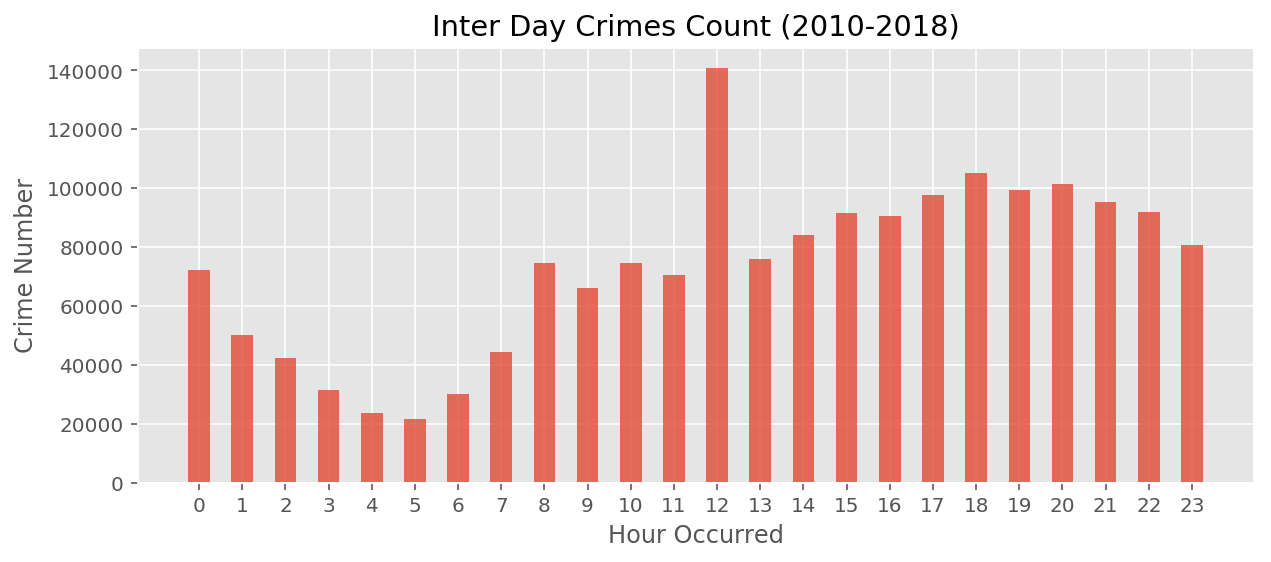

In [125]:
interday_count = df.groupby('hour occurred')['DR Number'].count().sort_index()

plt.figure(figsize=(10,4))
plt.bar(range(interday_count.size), interday_count, width=0.5, alpha=.8)
plt.xticks(range(interday_count.size), interday_count.index)
plt.xlabel('Hour Occurred')
plt.ylabel('Crime Number')
plt.title('Inter Day Crimes Count (2010-2018)');

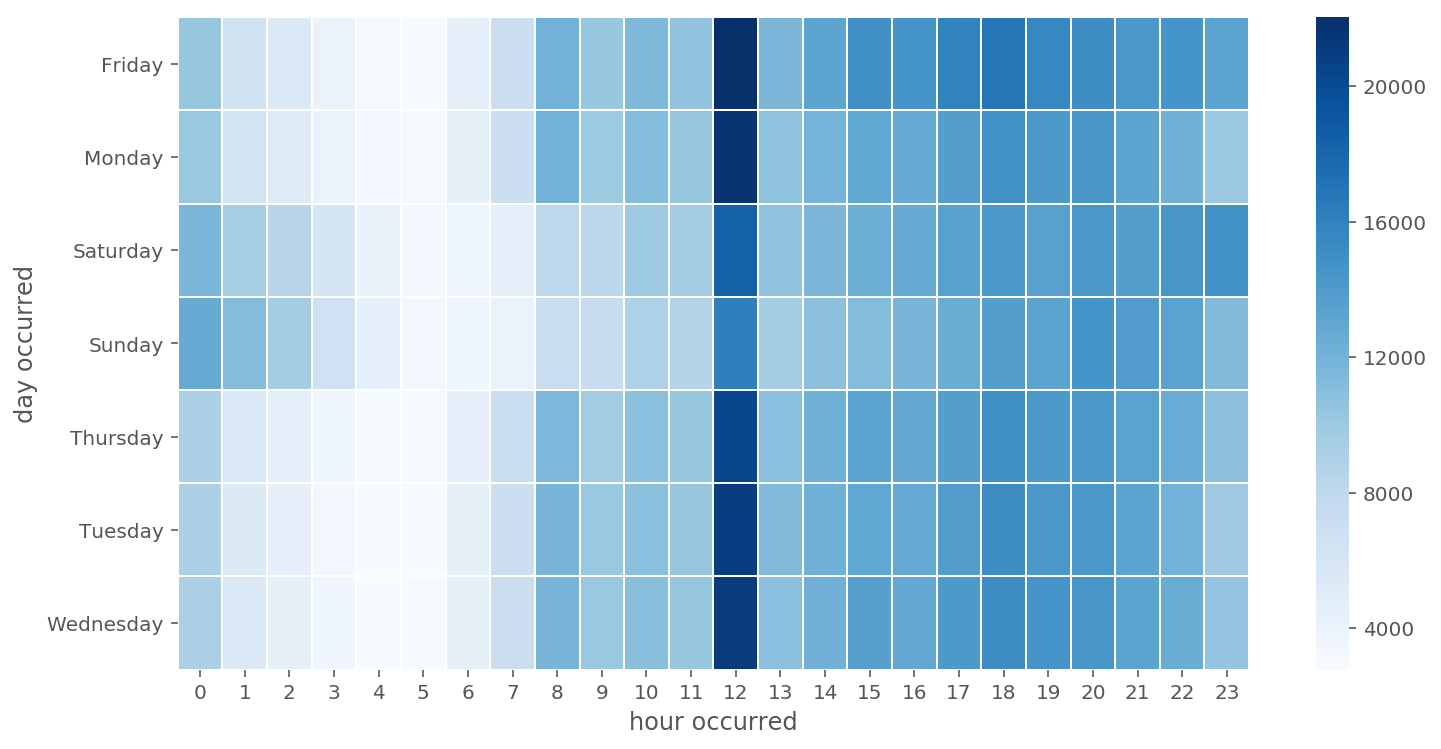

In [126]:
# cmap = sns.cm.rocket_r
m = df.groupby(['day occurred','hour occurred'])['DR Number'].count().unstack()
plt.figure(figsize=(12,6))
sns.heatmap(m, cmap='Blues', linewidth=0.5);

## Victim Characteristics Analysis

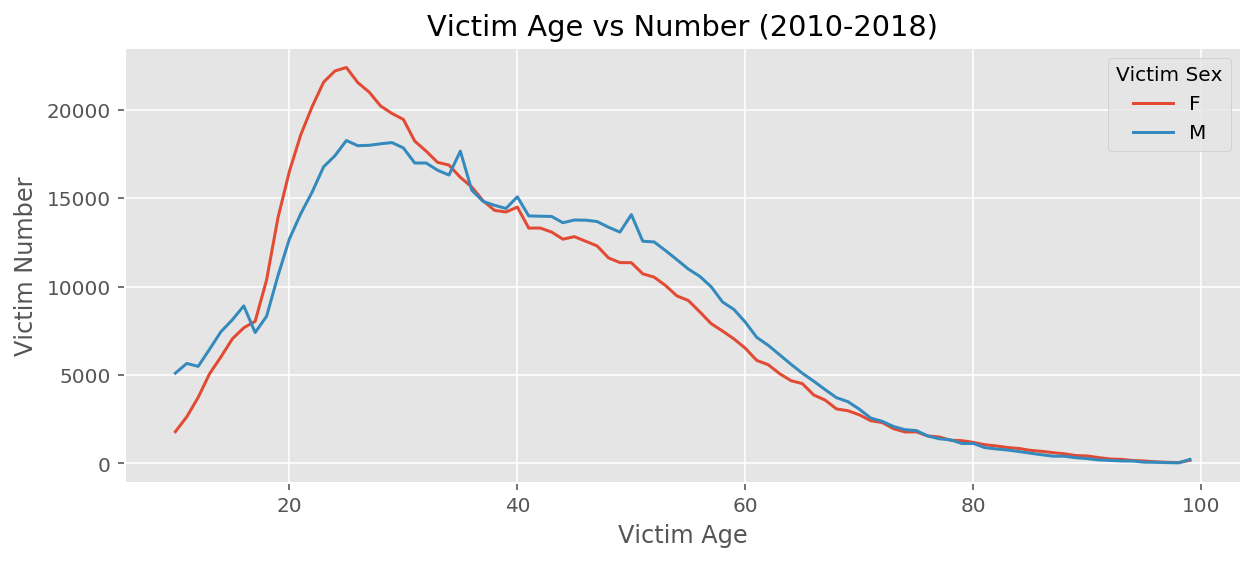

In [127]:
plt.style.use('ggplot')
df_victims = df.groupby(['Victim Age','Victim Sex'])['DR Number'].count().unstack()[['F','M']]
df_victims.plot(figsize=(10,4))
plt.title('Victim Age vs Number (2010-2018)')
plt.ylabel('Victim Number');

In [128]:
df_crime_gender=df.groupby(['Crime Code Description',
                            'Victim Sex'])['DR Number'].count().unstack()[['F','M']]
df_fvictim = df_crime_gender[df_crime_gender.F >= df_crime_gender.M]
df_fvictim['F/M'] = df_fvictim.F/df_fvictim.M
df_fvictim['F-M'] = df_fvictim.F-df_fvictim.M
f_fvictim_sorted = df_fvictim.sort_values('F', ascending=False).reset_index()
first_n=10
f_temp = f_fvictim_sorted.loc[:first_n-1,:]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


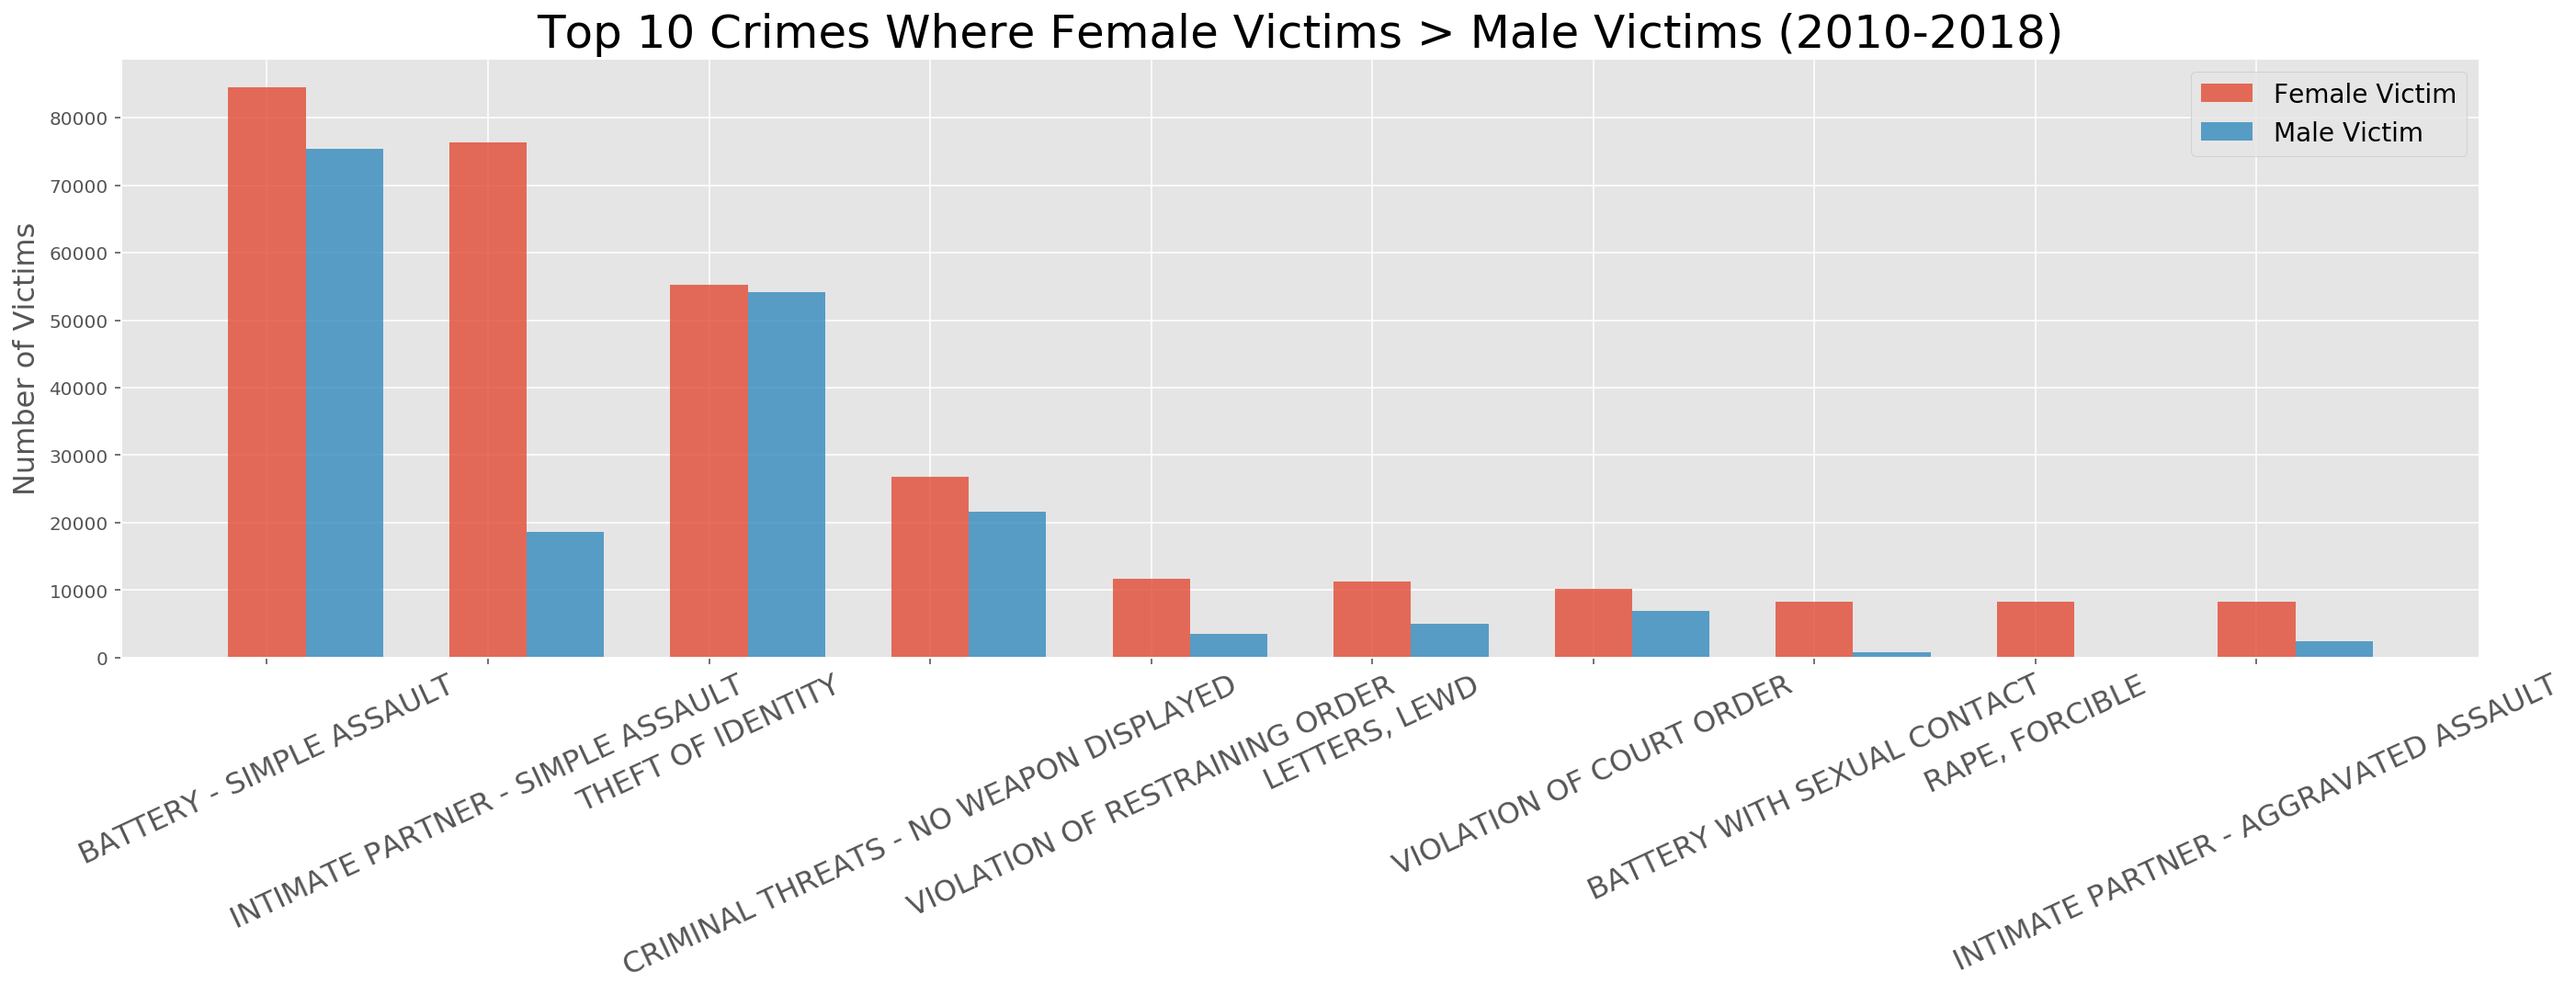

In [130]:
plt.figure(figsize=(23,6))
x = np.arange(f_temp.shape[0])
plt.bar(x, f_temp.F, width=0.35, label='Female Victim', alpha=.8)
plt.bar(x+0.35, f_temp.M, width=0.35, label='Male Victim', alpha=.8)
plt.xticks(x, f_temp['Crime Code Description'], rotation='25', fontsize=16)
plt.legend(loc='upper right', fontsize=14)
plt.title('Top {} Crimes Where Female Victims > Male Victims (2010-2018)'.format(first_n), fontsize=25)
plt.ylabel('Number of Victims', fontsize=16);

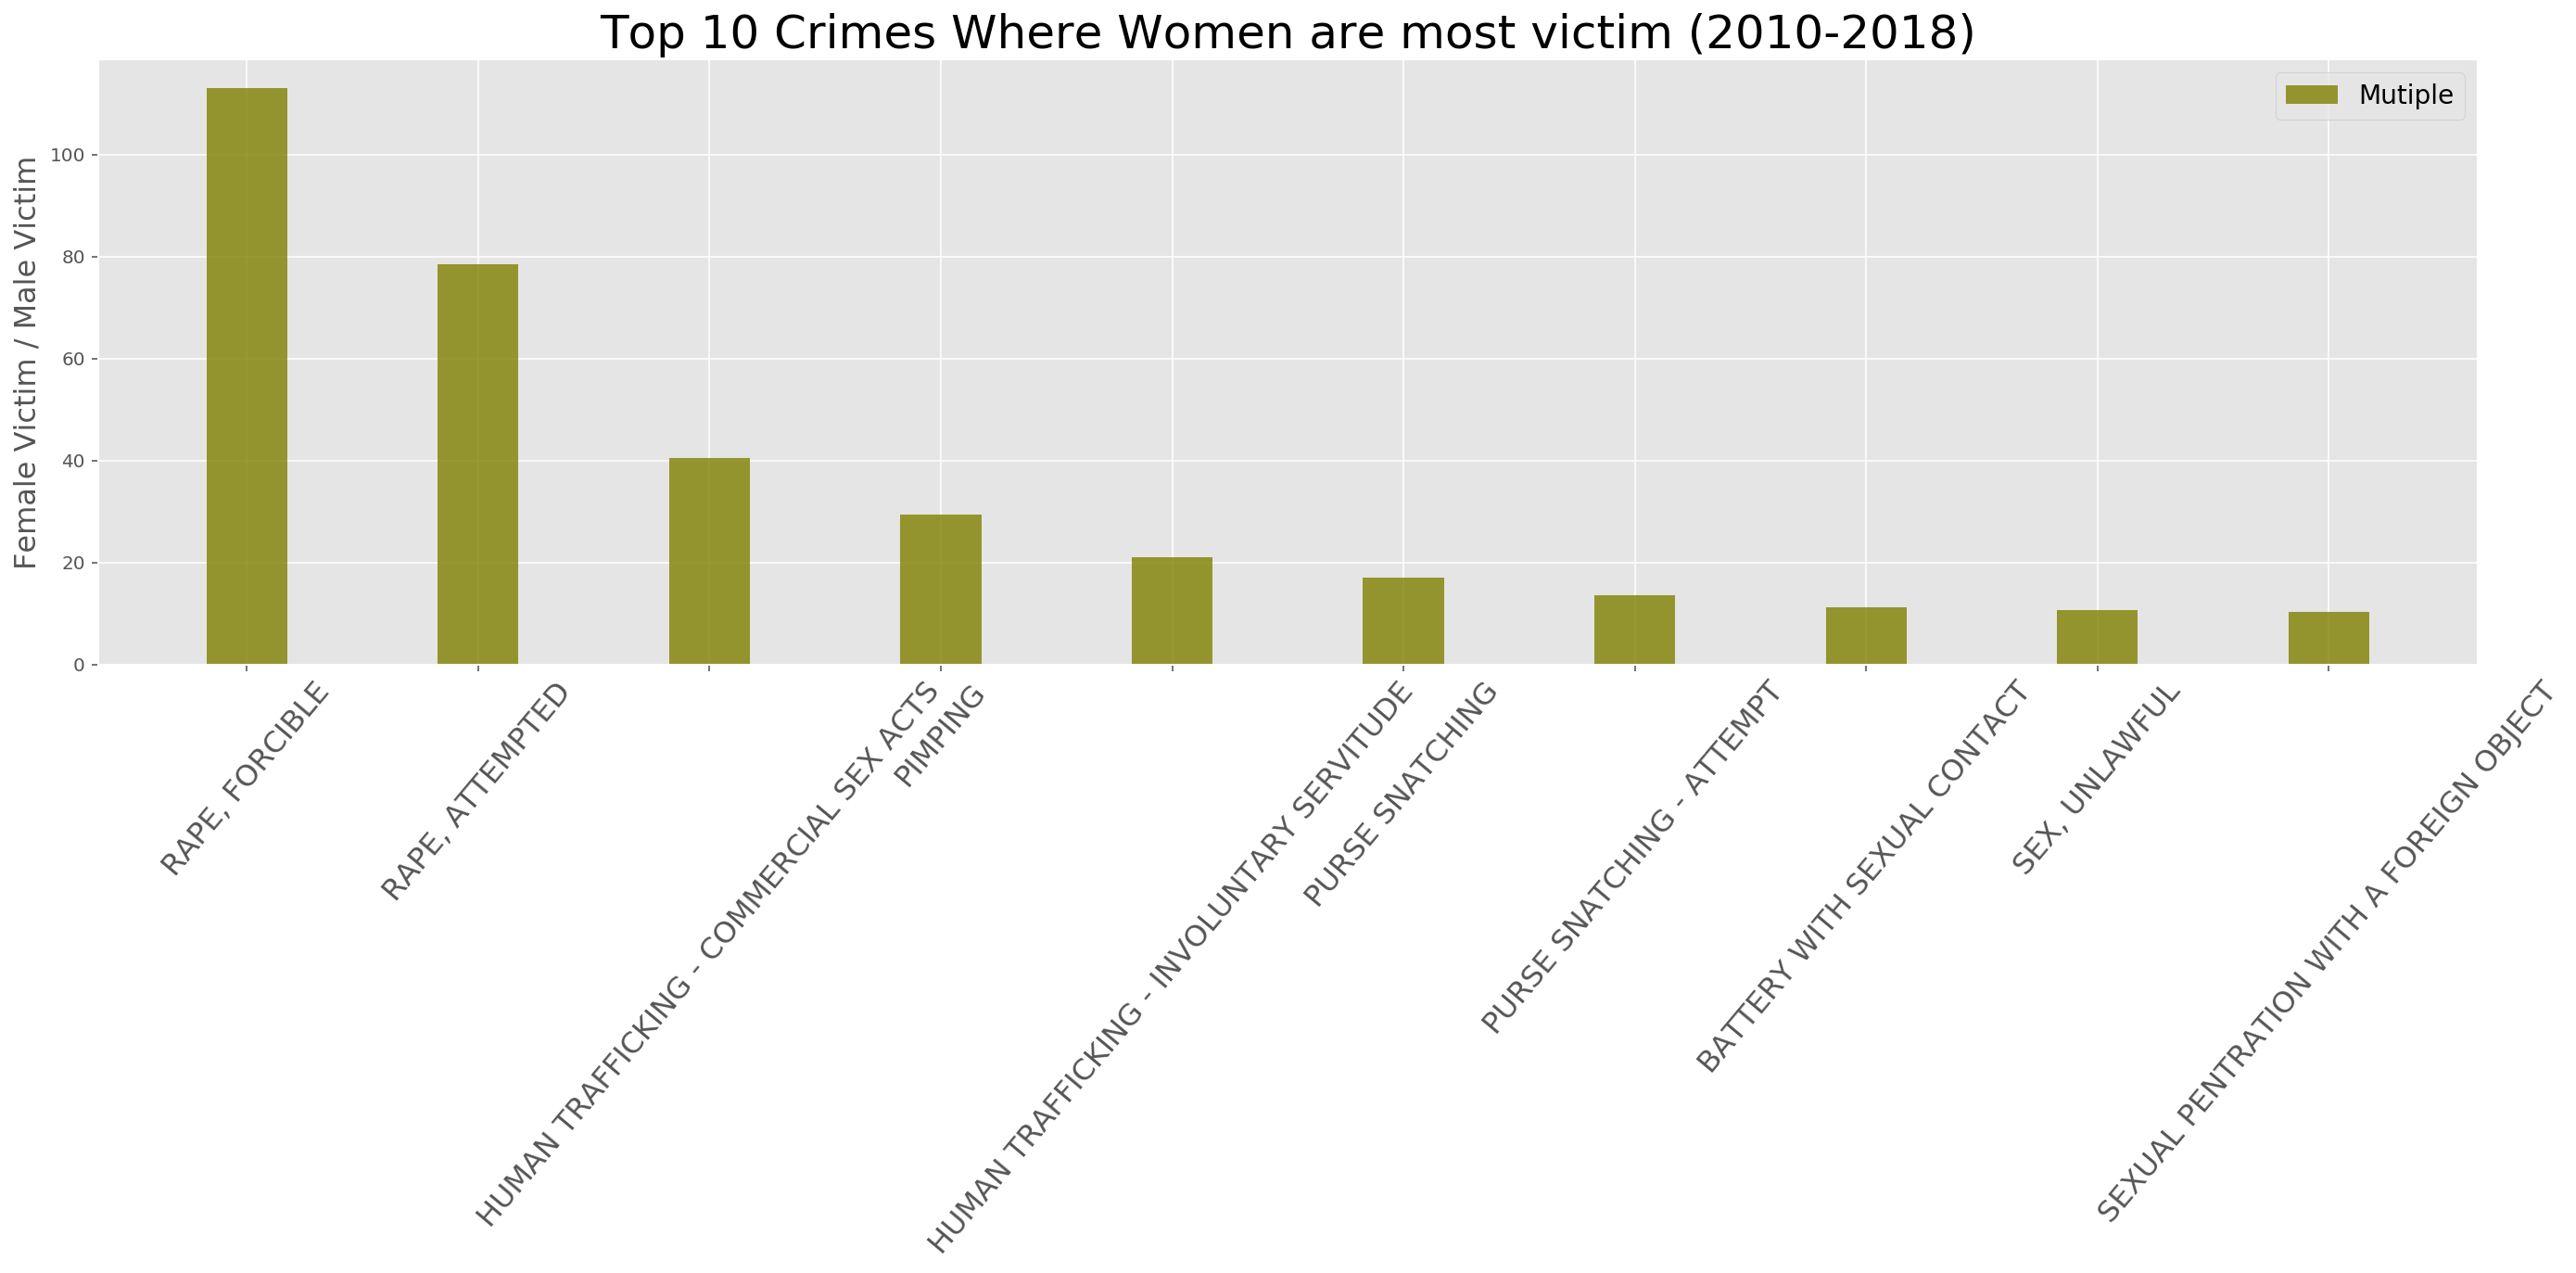

In [139]:
f_fvictim_sorted = df_fvictim.sort_values('F/M', ascending=False).reset_index()
first_n=10
f_temp = f_fvictim_sorted.loc[:first_n-1,:]

plt.figure(figsize=(23,6))
x = np.arange(f_temp.shape[0])
# plt.bar(x, f_temp.F, width=0.35, label='Female Victim', alpha=.8)
plt.bar(x, f_temp['F/M'], width=0.35, label='Mutiple',
    alpha=.8 , color='olive')
plt.xticks(x, f_temp['Crime Code Description'], rotation='50', fontsize=16)
plt.legend(loc='upper right', fontsize=14)
plt.title('Top {} Crimes Where Women are most victim (2010-2018)'.format(first_n), fontsize=25)
plt.ylabel('Female Victim / Male Victim', fontsize=16);

In [178]:
df_crime_age=df.groupby(['Crime Code Description',
                            'Victim Age'])['DR Number'].count().unstack().reset_index().set_index('Crime Code Description')
df_crime_age_child['sum_nb'] = df_crime_age.iloc[:,:12].sum(axis=1)
df_crime_age_child = df_crime_age_child.sort_values('sum_nb', ascending=False)
first_n = 10
df_crime_age_child = df_crime_age_child.iloc[:first_n,:]
df_crime_age_child

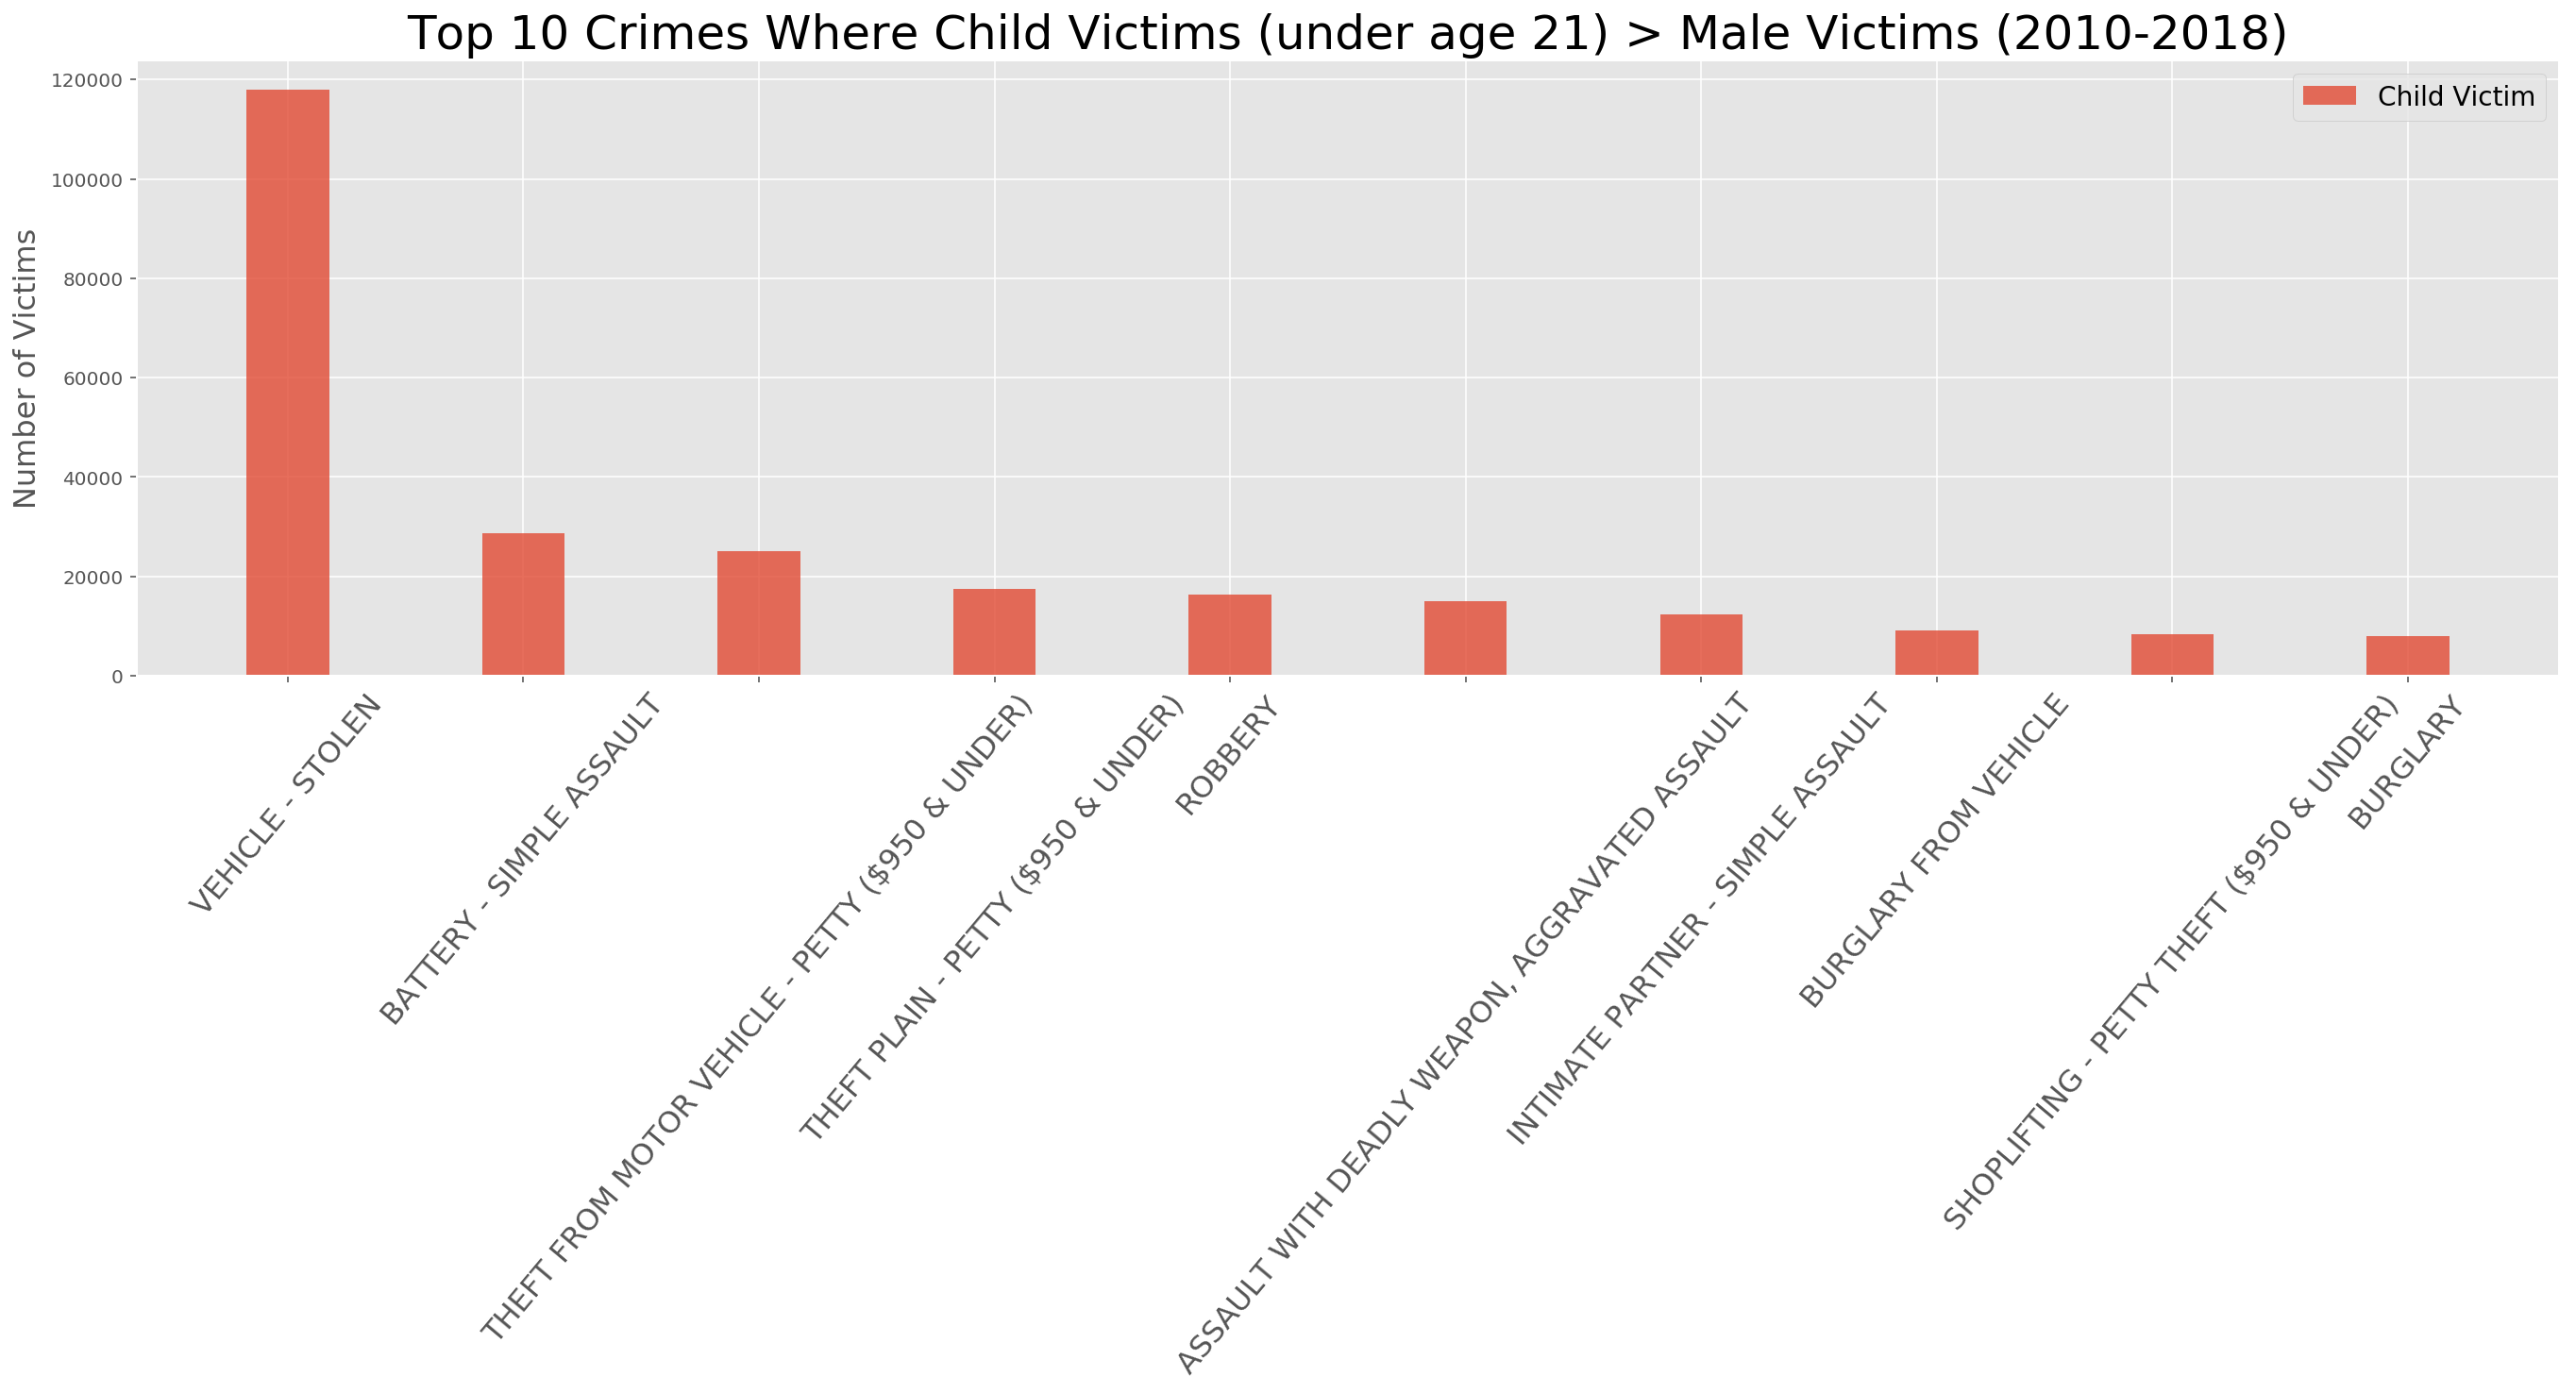

In [190]:
plt.figure(figsize=(23,6))
x = np.arange(df_crime_age_child.shape[0])
plt.bar(x, df_crime_age_child.sum_nb, width=0.35, label='Child Victim', alpha=.8)
#plt.bar(x+0.35, f_temp.M, width=0.35, label='Male Victim', alpha=.8)
plt.xticks(x, df_crime_age_child.index, rotation='50', fontsize=16);
plt.legend(loc='upper right', fontsize=14)
plt.title('Top {} Crimes Where Child Victims (under age 21) > Male Victims (2010-2018)'.format(first_n), fontsize=25)
plt.ylabel('Number of Victims', fontsize=16);

/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


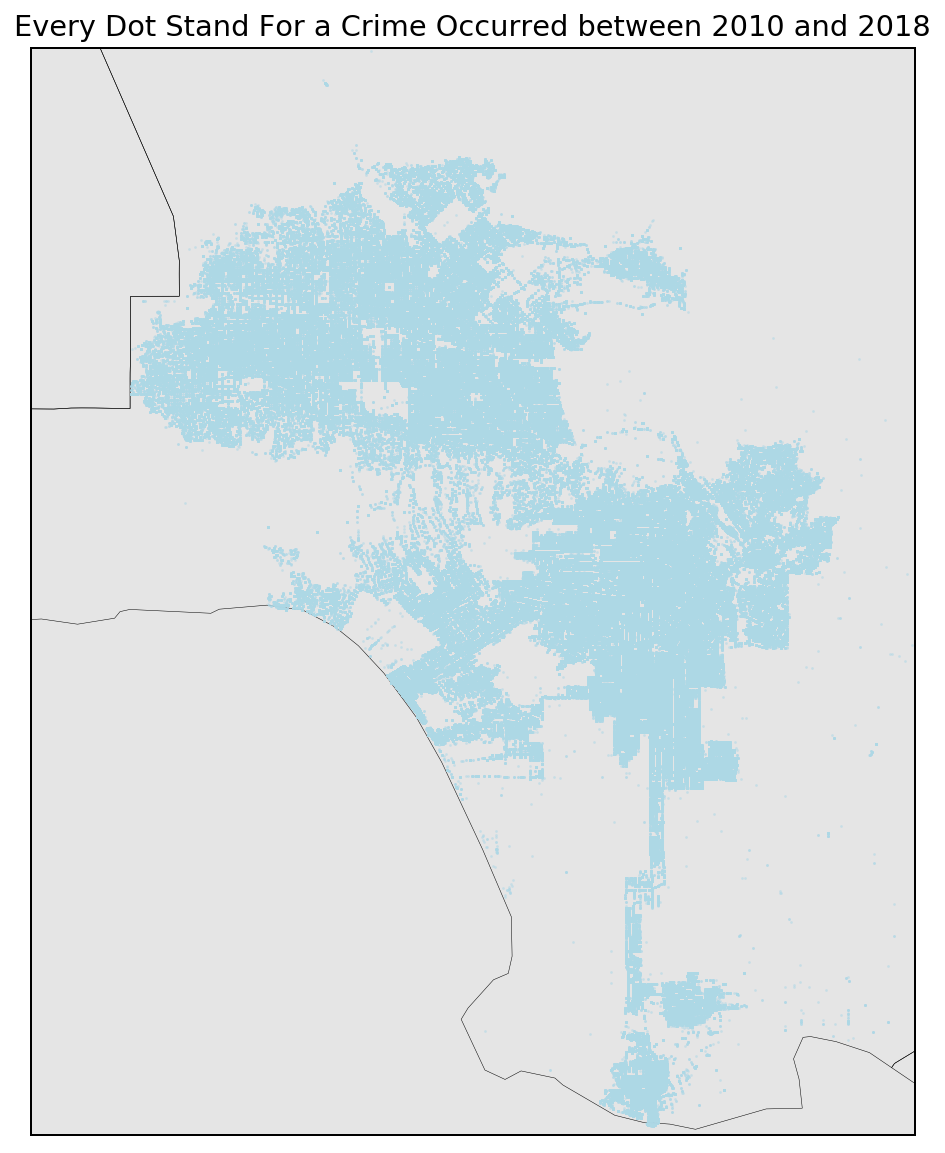

In [61]:
fig = plt.figure(figsize=(10, 10))
map = Basemap(projection='mill', llcrnrlat=33.7,urcrnrlat=34.4,\
            llcrnrlon=-118.74, urcrnrlon=-118.10, resolution='l')
map.drawcountries()
map.drawcounties(linewidth=0.25)
map.drawmapboundary()
map.fillcontinents(zorder=0)
map.drawrivers()


lons = df['Longitude'].tolist()
lats = df['Latitude'].tolist()

x, y = map(lons, lats)
map.scatter(x,y,0.8,marker='o',color='lightblue', alpha=0.4)
plt.title('Every Dot Stand For a Crime Occurred in LA between 2010 and 2018');

In [191]:
df.columns

Index(['DR Number', 'Date Reported', 'Date Occurred', 'Time Occurred',
       'Area ID', 'Area Name', 'Reporting District', 'Crime Code',
       'Crime Code Description', 'MO Codes', 'Victim Age', 'Victim Sex',
       'Victim Descent', 'Premise Code', 'Premise Description',
       'Weapon Used Code', 'Weapon Description', 'Status Code',
       'Status Description', 'Crime Code 1', 'Crime Code 2', 'Crime Code 3',
       'Crime Code 4', 'Address', 'Cross Street', 'Location',
       'Exact Time Occurred', 'Datetime', 'hour occurred', 'month occurred',
       'weekday occurred', 'dom occurred', 'day occurred', 'year occurred',
       'Latitude', 'Longitude', 'month'],
      dtype='object')

## Case By Case Study

### 1. Battery

In [252]:
# year = 2017
years = range(2010,2018)
colors = ['lightgreen','limegreen','green','darkslategrey','maroon','tomato','orange','peru']

df_battery = df[df['Crime Code Description']=='BATTERY - SIMPLE ASSAULT']

/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


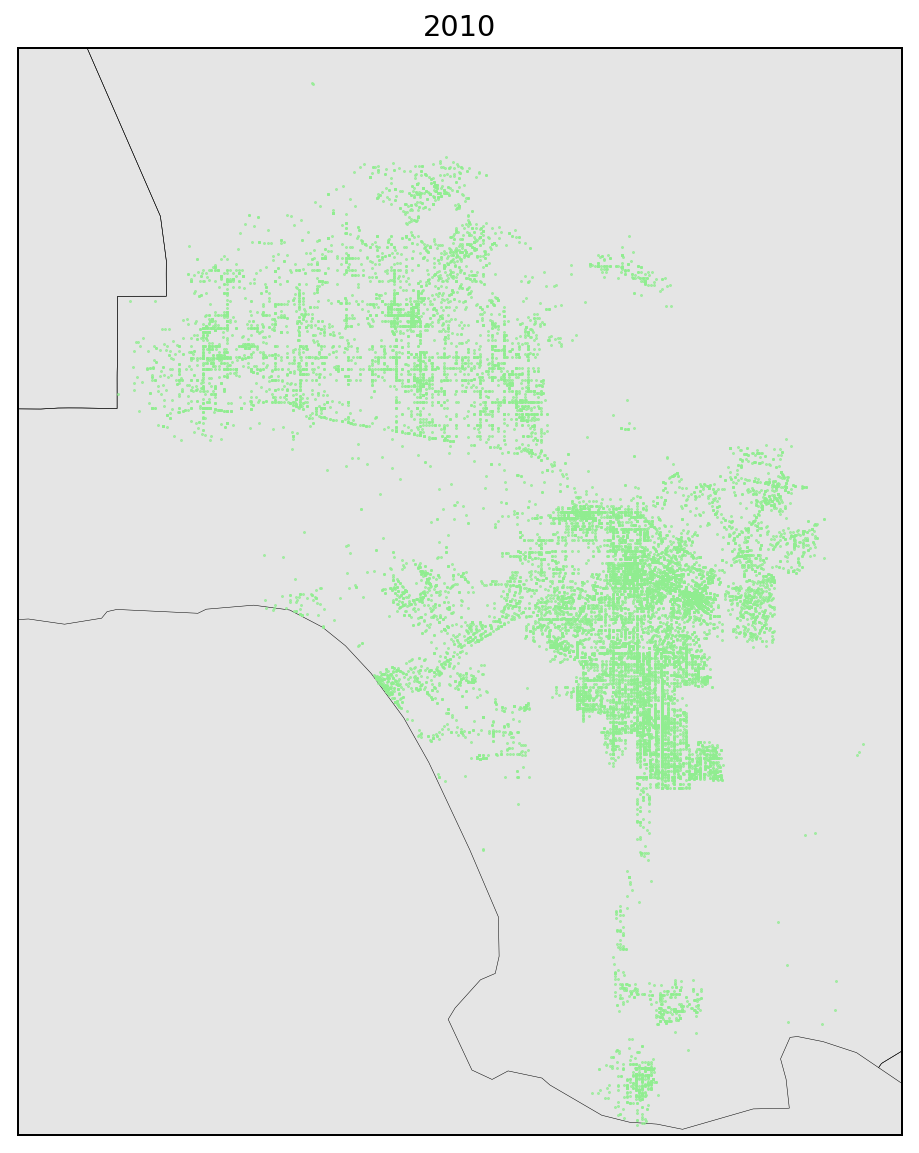

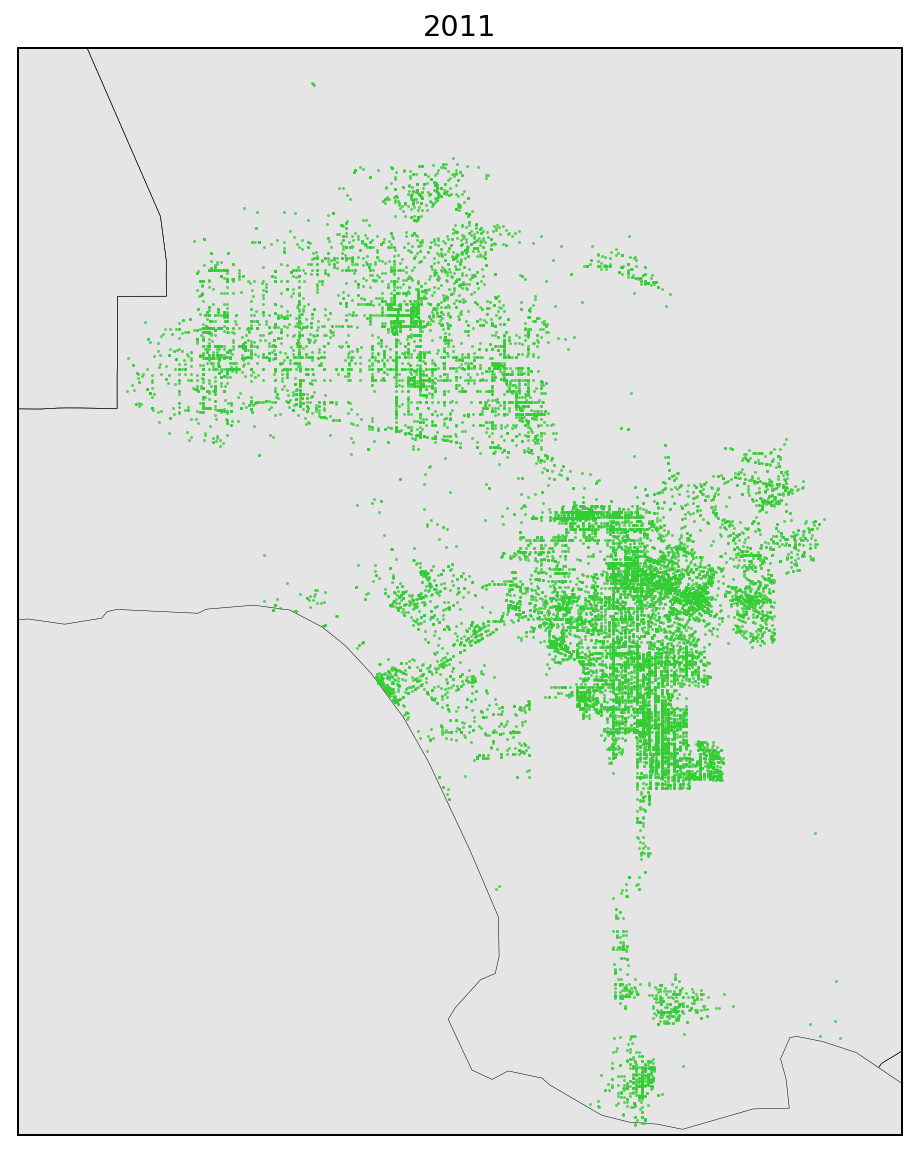

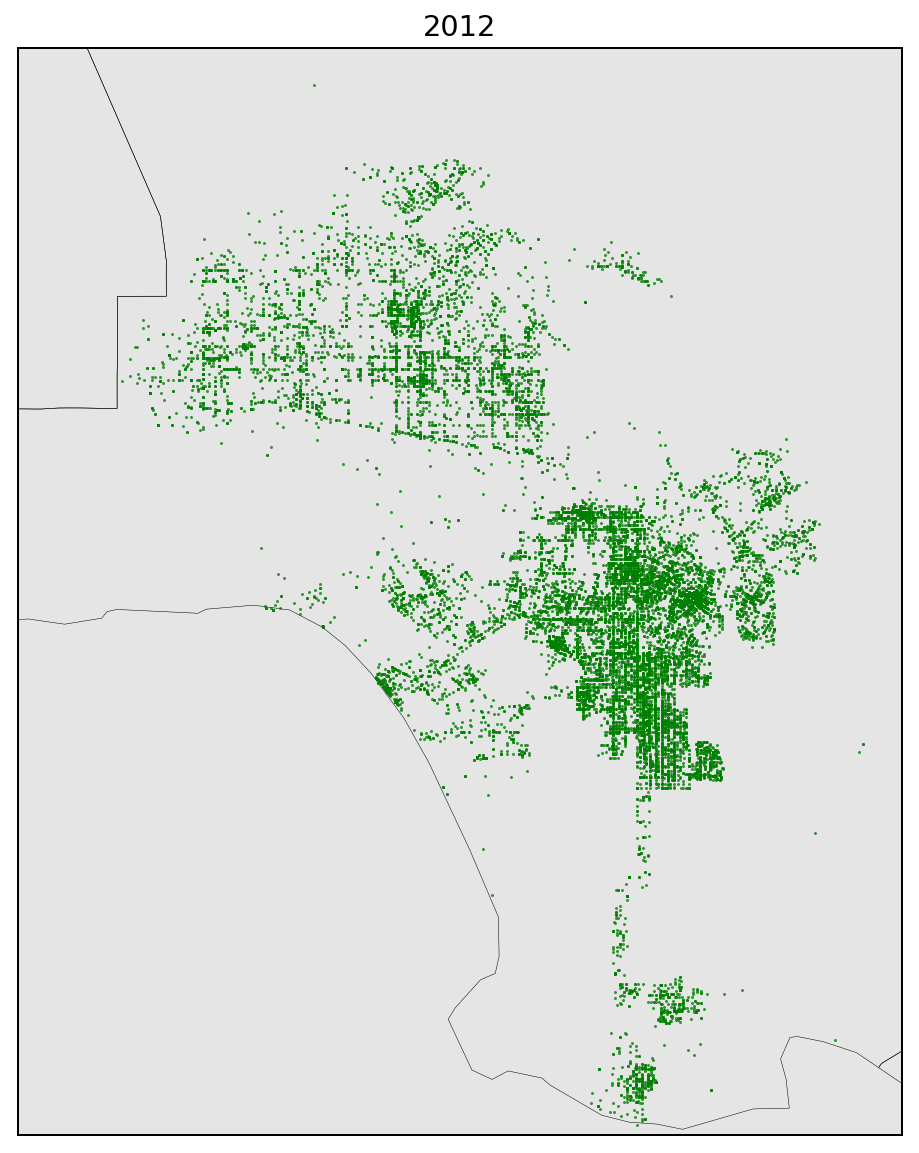

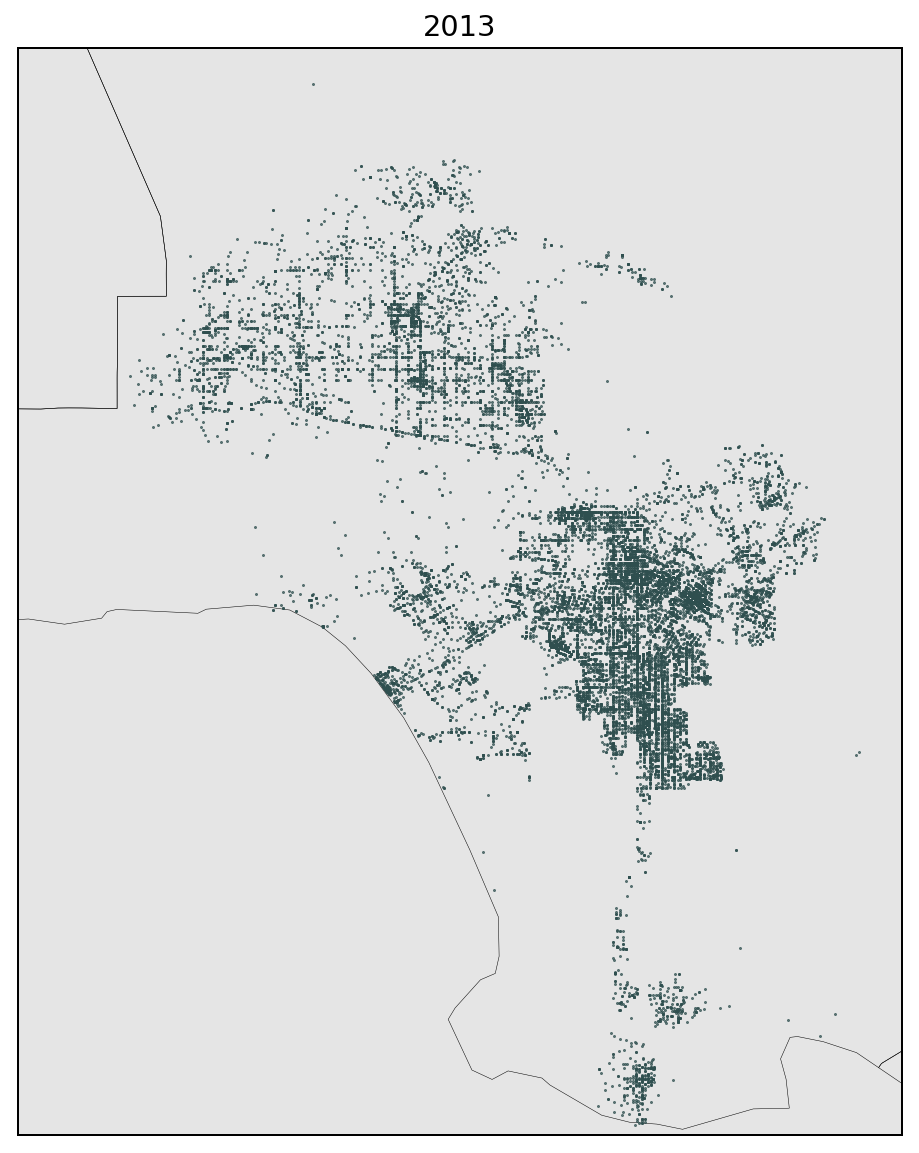

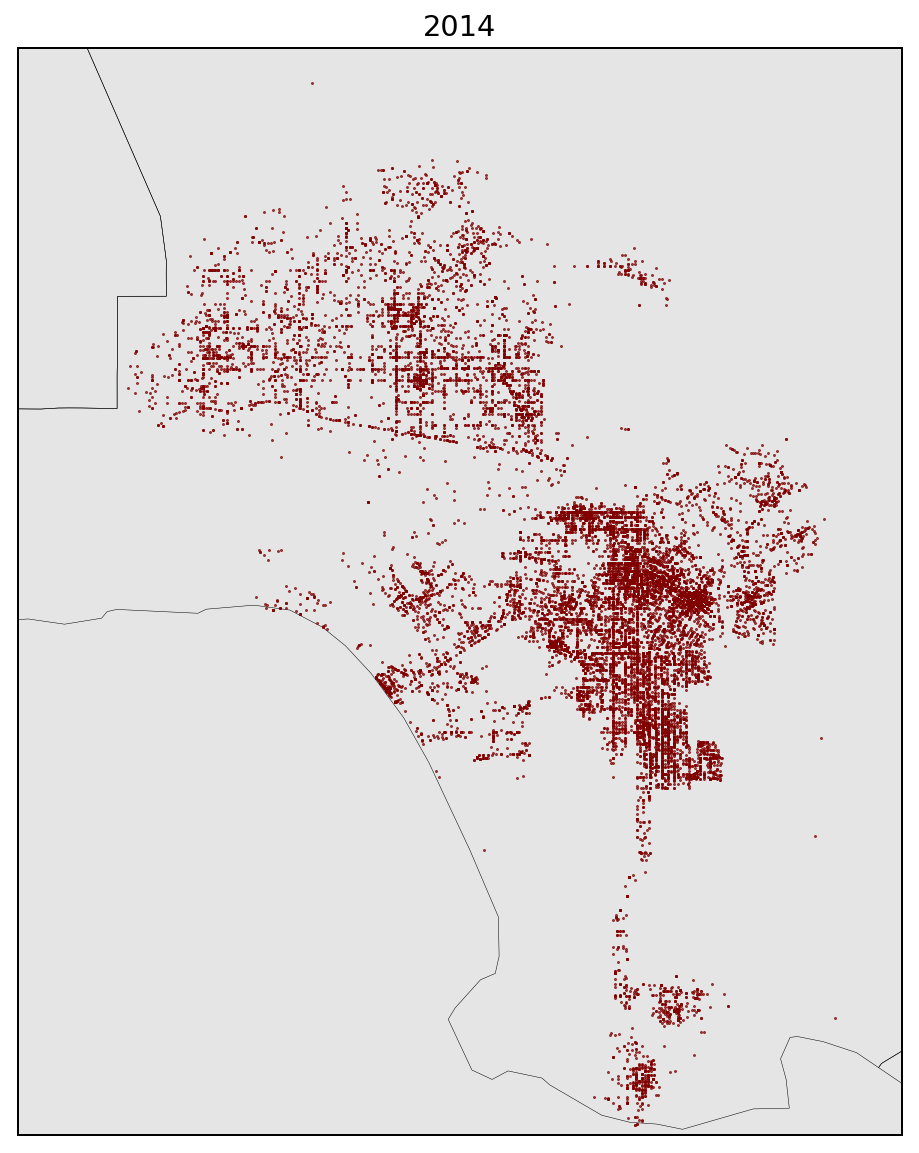

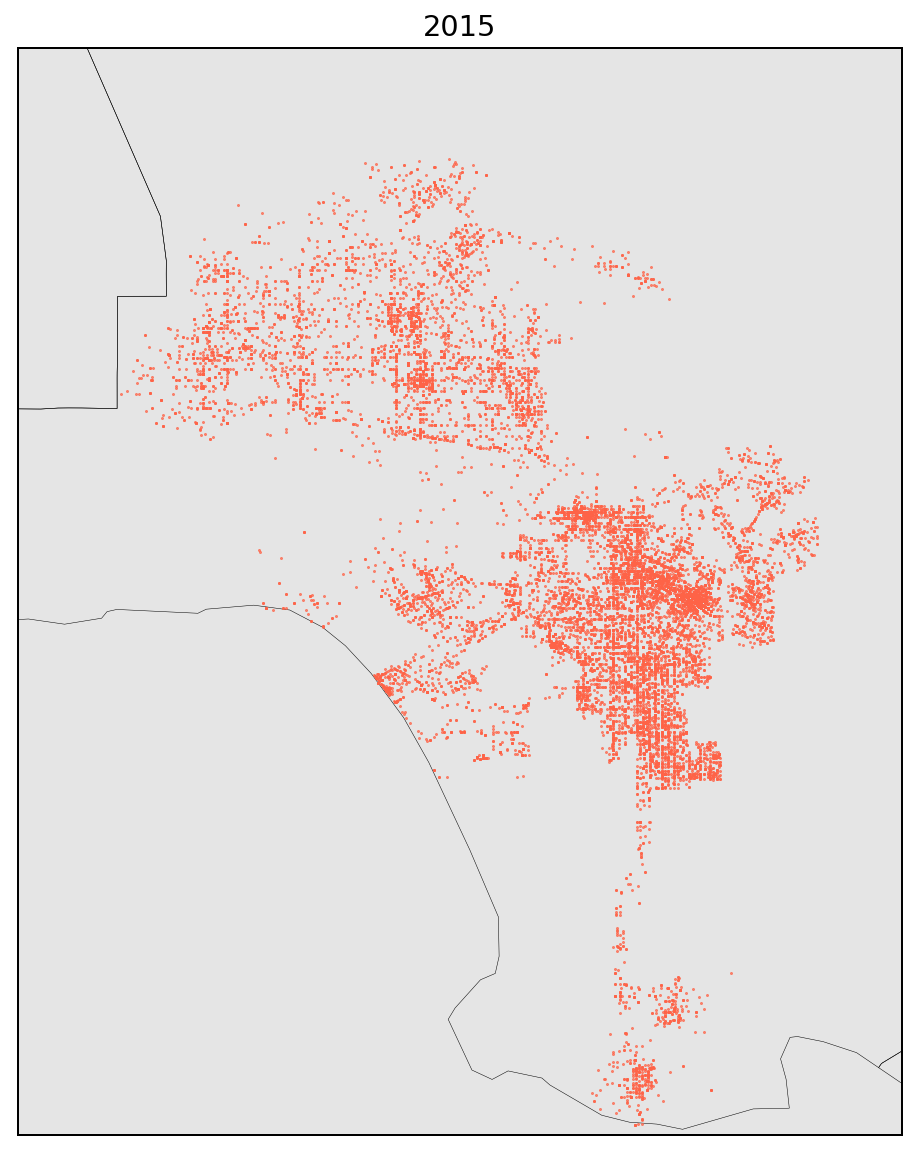

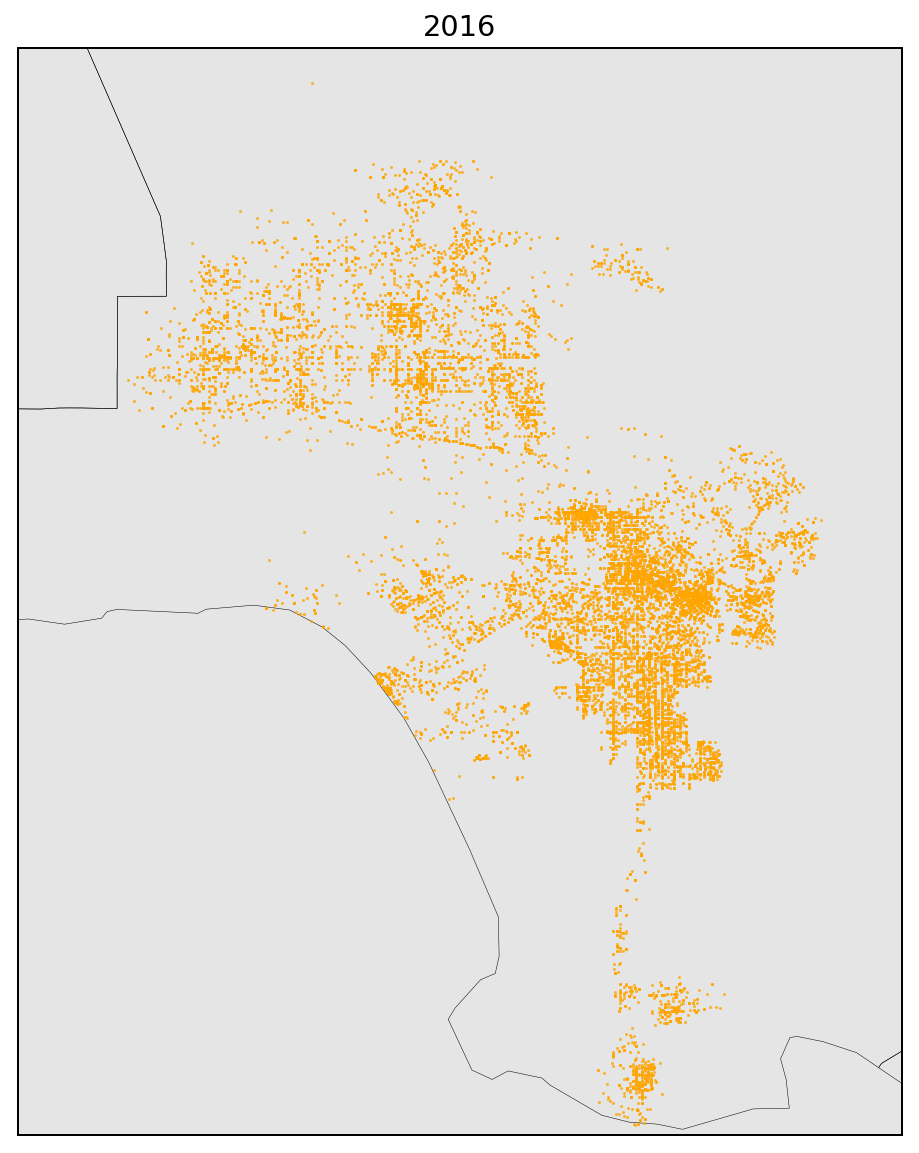

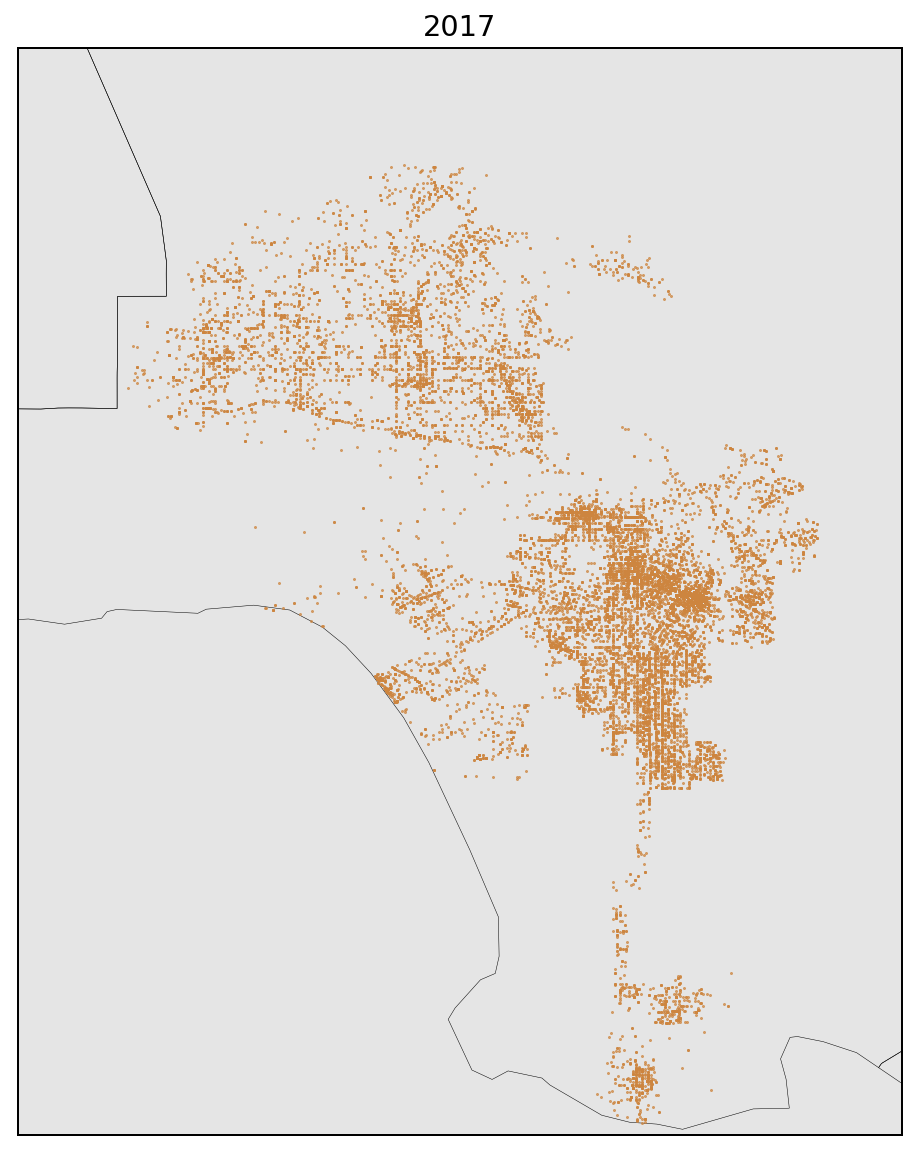

In [255]:
for year, color in zip(years, colors):
    
    df_battery_year = df_battery[df_battery['year occurred']==year]
    
    fig = plt.figure(figsize=(10, 10))
    m = Basemap(projection='mill', llcrnrlat=33.7,urcrnrlat=34.4,\
                llcrnrlon=-118.74, urcrnrlon=-118.10, resolution='l')
    m.drawcountries()
    m.drawcounties(linewidth=0.25)
    m.drawmapboundary()
    m.fillcontinents(zorder=0)
    m.drawrivers()


    lons = df_battery_year['Longitude'].tolist()
    lats = df_battery_year['Latitude'].tolist()

    x, y = m(lons, lats)
    m.scatter(x,y,1,marker='o', alpha=0.7, color=color)
    plt.title('{}'.format(year))
    
    plt.savefig("img/battery/battery{}.png".format(year));

In [243]:
import imageio

In [244]:
def create_gif(image_list, gif_name):  
  
    frames = []  
    for image_name in image_list:  
        frames.append(imageio.imread(image_name))  
    # Save them as frames into a gif   
    imageio.mimsave(gif_name, frames, 'GIF', duration = 0.1)  
  
    return

In [245]:
image_list = ['battery2010.png', 'battery2011.png', 'battery2012.png',   
              'battery2013.png', 'battery2014.png', 'battery2015.png',
             'battery2017.png']  
gif_name = 'created_battery.gif'  
create_gif(image_list, gif_name) 

In [199]:
for year in years:
    pass

LA CRIME EDA.ipynb battery2010.png    julia-Copy1.ipynb  notes.txt
README.md          crime_data.csv     julia.ipynb


In [203]:
df_battery_year.head()

DR Number Date Reported Date Occurred Time Occurred  Area ID  \
320806  110100506    01/04/2011    01/02/2011          2000        1   
320811  110100518    01/09/2011    01/09/2011          1725        1   
320815  110100543    01/16/2011    01/16/2011          0125        1   
320834  110100598    02/07/2011    02/07/2011          0015        1   
320836  110100606    02/10/2011    02/09/2011          2300        1   

       Area Name  Reporting District  Crime Code    Crime Code Description  \
320806   Central                 154         624  BATTERY - SIMPLE ASSAULT   
320811   Central                 185         624  BATTERY - SIMPLE ASSAULT   
320815   Central                 143         624  BATTERY - SIMPLE ASSAULT   
320834   Central                 192         624  BATTERY - SIMPLE ASSAULT   
320836   Central                 162         624  BATTERY - SIMPLE ASSAULT   

                   MO Codes  Victim Age Victim Sex Victim Descent  \
320806                 0416        52.0          M              B   
320811            0400 2000        29.0          M              H   
320815                 0400        26.0          M              W   
320834                 0400        44.0          M              B   
320836  0344 0416 1300 2000        28.0          F              W   

        Premise Code                           Premise Description  \
320806         502.0  MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)   
320811         102.0                                      SIDEWALK   
320815         102.0                                      SIDEWALK   
320834         102.0                                      SIDEWALK   
320836         101.0                                        STREET   

        Weapon Used Code                              Weapon Description  \
320806             400.0  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)   
320811             400.0  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)   
320815             400.0  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)   
320834             212.0                                          BOTTLE   
320836             400.0  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)   

       Status Code Status Description  Crime Code 1  Crime Code 2  \
320806          IC        Invest Cont         624.0           NaN   
320811          IC        Invest Cont         624.0           NaN   
320815          IC        Invest Cont         624.0           NaN   
320834          IC        Invest Cont         624.0           NaN   
320836          IC        Invest Cont         624.0           NaN   

        Crime Code 3  Crime Code 4                                  Address  \
320806           NaN           NaN   100 W  5TH                          ST   
320811           NaN           NaN                                     12TH   
320815           NaN           NaN   400 S  SPRING                       ST   
320834           NaN           NaN  1300 S  HOPE                         ST   
320836           NaN           NaN                                     HILL   

                           Cross Street              Location  \
320806                              NaN  (34.0467, -118.2485)   
320811  MAIN                         ST  (34.0373, -118.2588)   
320815                              NaN  (34.0488, -118.2483)   
320834                              NaN  (34.0395, -118.2656)   
320836                          OLYMPIC  (34.0416, -118.2584)   

       Exact Time Occurred            Datetime  hour occurred  month occurred  \
320806                2000 2011-01-02 20:00:00             20               1   
320811                1725 2011-01-09 17:25:00             17               1   
320815                0125 2011-01-16 01:25:00              1               1   
320834                0015 2011-02-07 00:15:00              0               2   
320836                2300 2011-02-09 23:00:00             23               2   

        weekday occurred  dom occurred day oc

RuntimeError: Can not put single artist in more than one figure

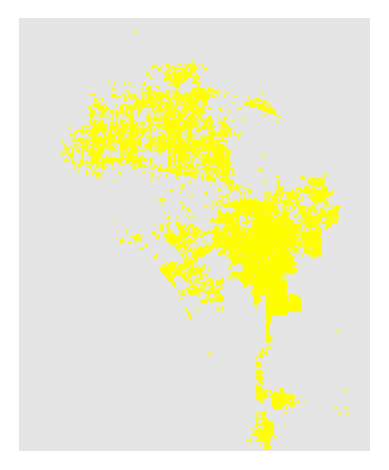

In [206]:
lons = df_battery_year['Longitude'].tolist()
lats = df_battery_year['Latitude'].tolist()

x, y = map(lons, lats)
map.scatter(x,y,1,marker='o',color='blue', alpha=0.6)
plt.title('{}'.format(year))
plt.savefig("img\battery{}.png".format(year));